## EDA assignment


EDA 1 - Bike Details Dataset

1. What is the range of selling prices in the dataset?
--> The range of selling prices in the dataset goes from ₹5,000 to ₹760,000.

2.  What is the median selling price for bikes in the dataset?
--> The median selling price for bikes in the dataset is ₹45,000.

3. What is the most common seller type?
--> The most common seller type is "Individual", with 1,055 listings out of 1,061. Only 6 listings are from Dealers.

4. How many bikes have driven more than 50,000 kilometers?
--> 171 bikes have driven more than 50,000 kilometers.

5. What is the average km_driven value for each ownership type?
--> the average kilometers driven for each ownership type:

4th owner: 311,500 km

2nd owner: ~39,289 km

3rd owner: ~33,292 km

1st owner: ~32,817 km

6. What proportion of bikes are from the year 2015 or older?
--> Approximately 57.87% of the bikes are from the year 2015 or older.

7. What is the trend of missing values across the dataset?
--> Trends and Patterns in Missing Values

a. Concentration in ex_showroom_price:

The only column with missing values is ex_showroom_price, indicating that the dataset is well-populated for most attributes but incomplete for original pricing information.

This could be due to:

Sellers not knowing or not providing the ex-showroom price (especially for older bikes).
Data collection limitations, where ex-showroom prices were not available for certain models or years.
Discontinued models or brands (e.g., older Hero Honda or Bajaj models) where ex-showroom prices are harder to source.

b. Correlation with Bike Year:

I analyzed whether missing ex_showroom_price values are more common in older bikes (pre-2015) versus newer ones (2015 or later):
Pre-2015 Bikes (614 bikes): 297 missing ex_showroom_price values (~48.4% of pre-2015 bikes).
2015 or Later Bikes (447 bikes): 138 missing ex_showroom_price values (~30.9% of 2015 or later bikes).
Trend: Missing ex-showroom prices are more prevalent for older bikes (pre-2015). This suggests that ex-showroom price data is harder to obtain for older models, possibly due to discontinued production or lack of historical records.

c. Correlation with Bike Brand:

I checked if missing ex_showroom_price values are associated with specific brands:

Royal Enfield: 94 missing out of 211 entries (44.5%)

Bajaj: 126 missing out of 317 entries (39.7%)

Honda: 88 missing out of 211 entries (41.7%)

Hero: 67 missing out of 159 entries (42.1%)

Yamaha: 39 missing out of 106 entries (36.8%)

TVS: 21 missing out of 53 entries (39.6%)

Trend: Missing values are distributed relatively evenly across brands, with no single brand showing a significantly higher proportion of missing data. However, Royal Enfield has a slightly higher rate, possibly due to older or premium models with less accessible pricing data.
d. Correlation with Seller Type:

Individual Sellers (1039 bikes): 426 missing ex_showroom_price values (~41.0%).

Dealer Sellers (22 bikes): 9 missing ex_showroom_price values (~40.9%).

Trend: The proportion of missing values is nearly identical for Individual and Dealer sellers, suggesting that seller type does not significantly influence the availability of ex-showroom price data.

e. Correlation with Ownership:

1st Owner (901 bikes): 365 missing ex_showroom_price values (40.5%).

2nd Owner (138 bikes): 62 missing ex_showroom_price values (44.9%).

3rd Owner (16 bikes): 7 missing ex_showroom_price values (43.8%).

4th Owner (6 bikes): 1 missing ex_showroom_price value (16.7%).

Trend: Missing values are slightly more common for bikes with multiple owners (2nd and 3rd owners), but the sample size for 3rd and 4th owners is small, making it less conclusive. This could indicate that bikes with more owners (often older) are less likely to have recorded ex-showroom prices.

8. What is the highest ex_showroom_price recorded, and for which bike?
--> The highest ex_showroom_price recorded in the "BIKE DETAILS.csv" dataset is 1,278,000 INR for the Harley-Davidson Street Bob (year: 2013).

9. What is the total number of bikes listed by each seller type?
--> 1061 bikes


Pearson Correlation Coefficient: -0.243
P-value: 0.000

Descriptive Statistics for First-Owner Bikes:
Selling Price (INR):
count       924.000000
mean      60022.813853
std       51542.569711
min        5000.000000
25%       30000.000000
50%       45000.000000
75%       74250.000000
max      760000.000000
Name: selling_price, dtype: float64

Kilometers Driven:
count       924.000000
mean      32816.583333
std       45870.365226
min         350.000000
25%       12000.000000
50%       24000.000000
75%       41000.000000
max      646000.000000
Name: km_driven, dtype: float64

Selling Price by Mileage Range:
                                      mean    min     max  count
mileage_range                                                   
Low (<10,000 km)             102112.656566  20000  760000    198
Moderate (10,000–50,000 km)   53013.991453   6000  300000    585
High (>50,000 km)             29997.085106   5000  120000    141


<ipython-input-1-f1fa53666955>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_owner_df['mileage_range'] = pd.cut(first_owner_df['km_driven'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-1-f1fa53666955>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_summary = first_owner_df.groupby('mileage_range')['selling_price'].agg(['mean', 'min', 'max', 'count'])


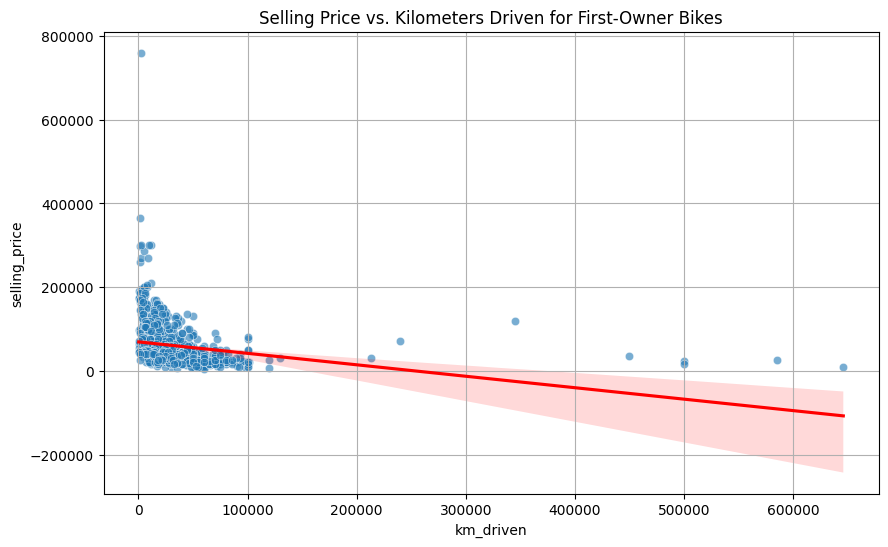


Sample Outliers (High km_driven, High selling_price):
                                name  selling_price  km_driven  year
797  Royal Enfield Electra Twinspark         120000     345000  2016

Sample Outliers (Low km_driven, Low selling_price):
Empty DataFrame
Columns: [name, selling_price, km_driven, year]
Index: []


In [1]:
# EDA 1 - What is the relationship between selling_price and km_driven for first-owner bikes?

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


df = pd.read_csv('BIKE DETAILS.csv')

first_owner_df = df[df['owner'] == '1st owner']

selling_price = first_owner_df['selling_price']
km_driven = first_owner_df['km_driven']

corr_coeff, p_value = pearsonr(selling_price, km_driven)
print(f"Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.3f}")

print("\nDescriptive Statistics for First-Owner Bikes:")
print("Selling Price (INR):")
print(selling_price.describe())
print("\nKilometers Driven:")
print(km_driven.describe())

bins = [0, 10000, 50000, float('inf')]
labels = ['Low (<10,000 km)', 'Moderate (10,000–50,000 km)', 'High (>50,000 km)']
first_owner_df['mileage_range'] = pd.cut(first_owner_df['km_driven'], bins=bins, labels=labels, include_lowest=True)
mileage_summary = first_owner_df.groupby('mileage_range')['selling_price'].agg(['mean', 'min', 'max', 'count'])
print("\nSelling Price by Mileage Range:")
print(mileage_summary)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_df, alpha=0.6)
plt.title('Selling Price vs. Kilometers Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.xscale('linear')  # Linear scale for km_driven
plt.yscale('linear')  # Linear scale for selling_price
plt.grid(True)

sns.regplot(x='km_driven', y='selling_price', data=first_owner_df, scatter=False, color='red')

plt.show()

print("\nSample Outliers (High km_driven, High selling_price):")
outliers_high = first_owner_df[(first_owner_df['km_driven'] > 50000) & (first_owner_df['selling_price'] > 100000)][['name', 'selling_price', 'km_driven', 'year']]
print(outliers_high)

print("\nSample Outliers (Low km_driven, Low selling_price):")
outliers_low = first_owner_df[(first_owner_df['km_driven'] < 10000) & (first_owner_df['selling_price'] < 20000)][['name', 'selling_price', 'km_driven', 'year']]
print(outliers_low)

In [2]:
# Identify and remove outliers in the km_driven column using the IQR methodB

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
num_outliers = len(outliers)

print(f"\nNumber of outliers in km_driven: {num_outliers}")
print("\nOutlier Details:")
print(outliers[['name', 'km_driven', 'selling_price', 'year', 'owner']])

cleaned_df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"\nOriginal dataset size: {len(df)} rows")
print(f"Cleaned dataset size: {len(cleaned_df)} rows")
print(f"Rows removed: {len(df) - len(cleaned_df)}")

cleaned_df.to_csv('BIKE_DETAILS_CLEANED.csv', index=False)
print("\nCleaned dataset saved as 'BIKE_DETAILS_CLEANED.csv'")

Q1 (25th percentile): 13500.0
Q3 (75th percentile): 43000.0
IQR: 29500.0
Lower Bound: -30750.0
Upper Bound: 87250.0

Number of outliers in km_driven: 39

Outlier Details:
                                 name  km_driven  selling_price  year  \
91           Honda Activa [2000-2015]     500000          22989  2012   
93                      Suzuki GS150R     130000          30000  2010   
115           Hero Honda Passion Plus     120000           7500  2004   
135            Hero Honda CBZ extreme      90000          20000  2007   
154                Hero Xtreme Sports      99000          22000  2014   
184              Honda CB Unicorn 160     100000          75000  2015   
363                Hero Honda CD100SS     646000          10000  1997   
470          Honda Activa [2000-2015]      95000          23000  2009   
474     Hero Honda Passion PRO [2012]      90000          12000  2012   
477          Honda Activa [2000-2015]     585659          25000  2009   
511                Hero Sp

Pearson Correlation Coefficient: 0.402
P-value: 0.000

Descriptive Statistics for Selling Price by Year:
               mean     min     max  count
year                                      
1988   20000.000000   20000   20000      1
1991    6000.000000    6000    6000      1
1993  130000.000000  130000  130000      1
1995  150000.000000  150000  150000      1
1997   17500.000000   10000   25000      2
1998   28333.333333    5000   65000      3
1999   15000.000000   15000   15000      1
2000   20833.333333   10000   70000      6
2001   40000.000000   20000   60000      2
2002   20666.666667    9000   27000      3
2003    8000.000000    8000    8000      1
2004   15100.000000    7500   20000      5
2005   16978.571429    8000   59000     14
2006   23380.000000    6000   99000     20
2007   24927.586207   10000   90000     29
2008   34289.285714   10000  180000     28
2009   22267.857143    7500   40000     28
2010   31793.333333   15000  125000     60
2011   35655.721311   15000  300000

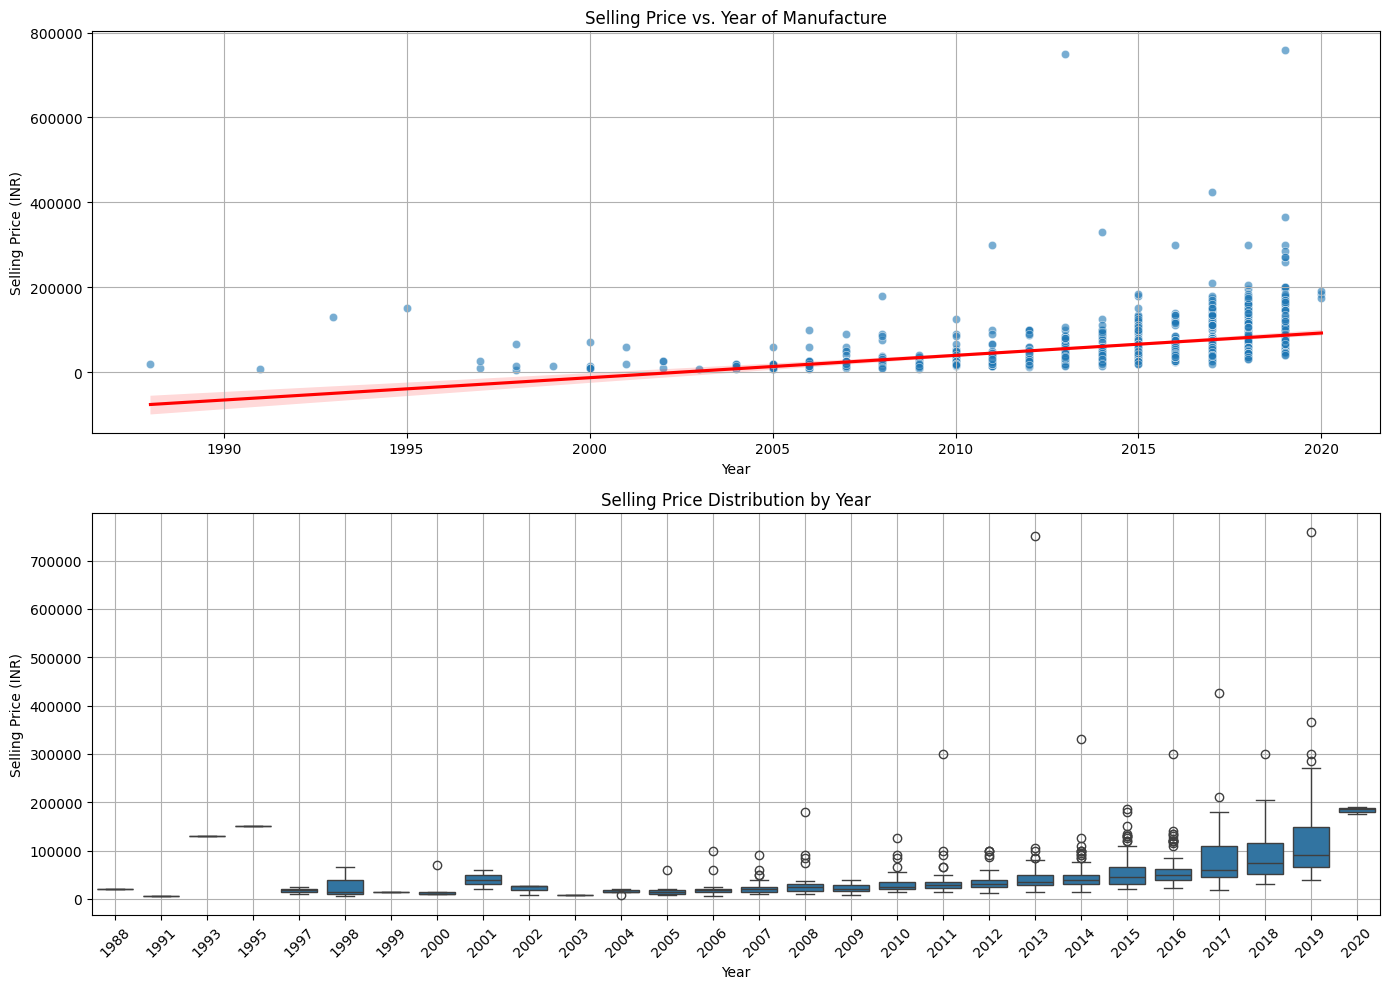

In [3]:
#  Perform a bivariate analysis to visualize the relationship between year and selling_price

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Extract relevant columns
year = df['year']
selling_price = df['selling_price']

# Compute Pearson correlation coefficient
corr_coeff, p_value = pearsonr(year, selling_price)
print(f"Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.3f}")

# Descriptive statistics for selling_price by year
print("\nDescriptive Statistics for Selling Price by Year:")
yearly_stats = df.groupby('year')['selling_price'].agg(['mean', 'min', 'max', 'count'])
print(yearly_stats)

# Create a figure with two subplots
plt.figure(figsize=(14, 10))

# Subplot 1: Scatter plot with trend line
plt.subplot(2, 1, 1)
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6)
sns.regplot(x='year', y='selling_price', data=df, scatter=False, color='red')
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.grid(True)

# Subplot 2: Box plot to show distribution of selling_price by year
plt.subplot(2, 1, 2)
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Selling Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [4]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Define the current year
current_year = 2025

# Calculate bike age
df['age'] = current_year - df['year']

# Filter rows with non-missing ex_showroom_price
df_valid = df.dropna(subset=['ex_showroom_price']).copy()

# Calculate depreciation percentage
# Depreciation (%) = (ex_showroom_price - selling_price) / ex_showroom_price * 100
df_valid['depreciation'] = ((df_valid['ex_showroom_price'] - df_valid['selling_price']) / df_valid['ex_showroom_price']) * 100

# Handle cases where depreciation is negative (selling_price > ex_showroom_price)
# These may be data errors or special cases (e.g., rare bikes); we'll cap at 0% for analysis
df_valid['depreciation'] = df_valid['depreciation'].apply(lambda x: max(x, 0))

# Group by age and calculate average depreciation
depreciation_by_age = df_valid.groupby('age')['depreciation'].agg(['mean', 'count']).reset_index()
depreciation_by_age.columns = ['age', 'avg_depreciation', 'num_bikes']

# Sort by age for clarity
depreciation_by_age = depreciation_by_age.sort_values('age')

# Print results
print("Average Depreciation by Bike Age:")
print(depreciation_by_age)

# Calculate overall average depreciation (weighted by number of bikes)
total_bikes = depreciation_by_age['num_bikes'].sum()
weighted_avg_depreciation = (depreciation_by_age['avg_depreciation'] * depreciation_by_age['num_bikes']).sum() / total_bikes
print(f"\nOverall Weighted Average Depreciation: {weighted_avg_depreciation:.2f}%")

# Optional: Save results to a CSV file
depreciation_by_age.to_csv('depreciation_by_age.csv', index=False)
print("\nDepreciation results saved as 'depreciation_by_age.csv'")

Average Depreciation by Bike Age:
    age  avg_depreciation  num_bikes
0     5          0.000000          1
1     6          6.510818         48
2     7         14.964999         77
3     8         23.646979         85
4     9         33.570717         84
5    10         36.065374         80
6    11         39.899626         66
7    12         46.829522         53
8    13         52.973641         37
9    14         58.773457         33
10   15         58.148112         28
11   16         61.784763         14
12   17         72.661454          7
13   18         62.080980          6
14   19         77.160118          4
15   20         81.769124          1
16   21         67.184424          1
17   24         63.538248          1

Overall Weighted Average Depreciation: 35.29%

Depreciation results saved as 'depreciation_by_age.csv'


In [5]:
# Which bike names are priced significantly above the average price for their manufacturing year

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Calculate mean and standard deviation of selling_price by year
yearly_stats = df.groupby('year')['selling_price'].agg(['mean', 'std', 'count']).reset_index()
yearly_stats.columns = ['year', 'mean_price', 'std_price', 'num_bikes']

# Define the threshold for "significantly above average" (mean + 2 * std)
yearly_stats['threshold'] = yearly_stats['mean_price'] + 2 * yearly_stats['std_price']

# Merge yearly_stats with the original dataset to compare each bike's price
df = df.merge(yearly_stats[['year', 'mean_price', 'threshold']], on='year', how='left')

# Identify bikes with selling_price above the threshold
high_price_bikes = df[df['selling_price'] > df['threshold']].copy()

# Select relevant columns for reporting
high_price_bikes = high_price_bikes[['name', 'year', 'selling_price', 'mean_price', 'threshold']]

# Sort by year and selling_price for clarity
high_price_bikes = high_price_bikes.sort_values(['year', 'selling_price'], ascending=[True, False])

# Print results
print("Bikes Priced Significantly Above Average for Their Manufacturing Year:")
print(f"(Significantly above average defined as selling_price > mean + 2 * std for the year)")
print(high_price_bikes)

# Summary: Count of high-priced bikes by year
high_price_summary = high_price_bikes.groupby('year').size().reset_index(name='num_high_priced_bikes')
print("\nSummary: Number of High-Priced Bikes by Year:")
print(high_price_summary)

# Optional: Save results to a CSV file
high_price_bikes.to_csv('high_priced_bikes.csv', index=False)
print("\nResults saved as 'high_priced_bikes.csv'")

Bikes Priced Significantly Above Average for Their Manufacturing Year:
(Significantly above average defined as selling_price > mean + 2 * std for the year)
                                     name  year  selling_price     mean_price  \
306                             Yamaha Rx  2000          70000   20833.333333   
889         Royal Enfield Thunderbird 350  2005          59000   16978.571429   
776             Royal Enfield Electra 5 S  2006          99000   23380.000000   
224  Royal Enfield Bullet 350 [2007-2011]  2007          90000   24927.586207   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714   
958                Hero Honda CBZ extreme  2009          40000   22267.857143   
291                   Kawasaki Ninja 250R  2010         125000   31793.333333   
52              Royal Enfield Electra 5 S  2010          90000   31793.333333   
389         Royal Enfield Thunderbird 350  2010          85000   31793.333333   
860        Kawasaki Ninja 650 [201

Correlation Matrix for Numeric Columns:
                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


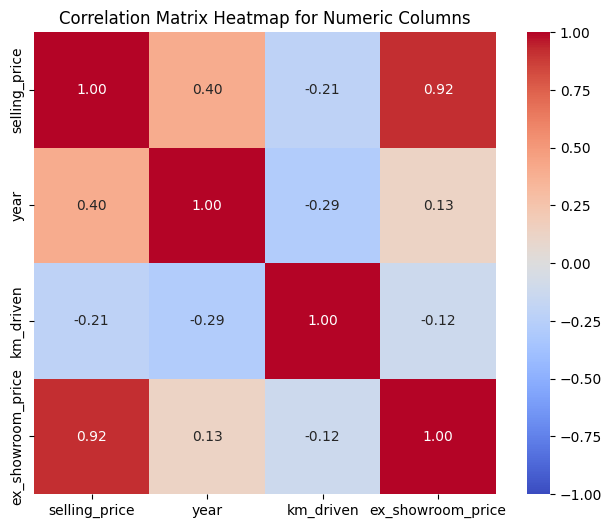


Correlation matrix saved as 'correlation_matrix.csv'


In [6]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap.

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Select numeric columns
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
numeric_df = df[numeric_cols]

# Compute the correlation matrix using Pearson's correlation coefficient
# Use pairwise deletion (dropna='pairwise') to handle missing values in ex_showroom_price
corr_matrix = numeric_df.corr(method='pearson')

# Print the correlation matrix
print("Correlation Matrix for Numeric Columns:")
print(corr_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme (red for positive, blue for negative)
            vmin=-1, vmax=1,     # Range for correlation values
            center=0,            # Center the colormap at 0
            square=True,         # Make cells square
            fmt='.2f')           # Format numbers to 2 decimal places
plt.title('Correlation Matrix Heatmap for Numeric Columns')
plt.show()

corr_matrix.to_csv('correlation_matrix.csv')
print("\nCorrelation matrix saved as 'correlation_matrix.csv'")

## EDA 2

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
-->

In [7]:
# What is the average selling price of cars for each dealer, and how does it compare across different dealers

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Price ($) and Dealer_Name
missing_price = df['Price ($)'].isna().sum()
missing_dealer = df['Dealer_Name'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Dealer_Name = {missing_dealer}")

# Group by Dealer_Name and calculate mean and count of Price ($)
dealer_stats = df.groupby('Dealer_Name')['Price ($)'].agg(['mean', 'count', 'std']).reset_index()
dealer_stats.columns = ['Dealer_Name', 'Average_Price', 'Num_Sales', 'Std_Price']

# Round Average_Price and Std_Price for readability
dealer_stats['Average_Price'] = dealer_stats['Average_Price'].round(2)
dealer_stats['Std_Price'] = dealer_stats['Std_Price'].round(2)

# Sort by Average_Price in descending order
dealer_stats = dealer_stats.sort_values('Average_Price', ascending=False)

# Print the dealer statistics
print("\nAverage Selling Price of Cars by Dealer (Sorted by Average Price):")
print(dealer_stats)

# Summary statistics
print("\nSummary of Average Prices Across Dealers:")
print(f"Number of Dealers: {len(dealer_stats)}")
print(f"Highest Average Price: {dealer_stats['Average_Price'].max():.2f} USD (Dealer: {dealer_stats.iloc[0]['Dealer_Name']})")
print(f"Lowest Average Price: {dealer_stats['Average_Price'].min():.2f} USD (Dealer: {dealer_stats.iloc[-1]['Dealer_Name']})")
print(f"Range of Average Prices: {dealer_stats['Average_Price'].max() - dealer_stats['Average_Price'].min():.2f} USD")
print(f"Mean of Average Prices: {dealer_stats['Average_Price'].mean():.2f} USD")
print(f"Standard Deviation of Average Prices: {dealer_stats['Average_Price'].std():.2f} USD")

# Analyze by Dealer_Region (optional, for context)
region_dealer_stats = df.groupby(['Dealer_Region', 'Dealer_Name'])['Price ($)'].mean().reset_index()
region_dealer_stats['Price ($)'] = region_dealer_stats['Price ($)'].round(2)
print("\nAverage Selling Price by Dealer and Region:")
print(region_dealer_stats.sort_values('Price ($)', ascending=False))

# Optional: Save results to a CSV file
dealer_stats.to_csv('dealer_avg_prices.csv', index=False)
print("\nResults saved as 'dealer_avg_prices.csv'")

Missing values: Price ($) = 0, Dealer_Name = 0

Average Selling Price of Cars by Dealer (Sorted by Average Price):
                                        Dealer_Name  Average_Price  Num_Sales  \
27                                        U-Haul CO       28769.92       1247   
5                                     Classic Chevy       28602.01        623   
19                             Rabun Used Car Sales       28527.54       1313   
11                                  Iceberg Rentals       28522.96        627   
8                             Enterprise Rent A Car       28312.58        625   
23                Scrivener Performance Engineering       28297.37       1246   
9                        Gartner Buick Hyundai Saab       28247.62        628   
22                                 Saab-Belle Dodge       28190.14       1251   
2                                       Capitol KIA       28189.70        628   
20                                    Race Car Help       28163.37       12

In [8]:
# Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Price ($) and Company
missing_price = df['Price ($)'].isna().sum()
missing_company = df['Company'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Company = {missing_company}")

# Group by Company and calculate standard deviation, count, mean, min, and max of Price ($)
brand_stats = df.groupby('Company')['Price ($)'].agg(
    std='std',
    count='count',
    mean='mean',
    min='min',
    max='max'
).reset_index()

# Round numerical columns for readability
brand_stats['std'] = brand_stats['std'].round(2)
brand_stats['mean'] = brand_stats['mean'].round(2)
brand_stats['min'] = brand_stats['min'].round(2)
brand_stats['max'] = brand_stats['max'].round(2)

# Filter brands with sufficient sales (e.g., at least 50 sales) for reliable statistics
brand_stats = brand_stats[brand_stats['count'] >= 50]

# Sort by standard deviation in descending order
brand_stats = brand_stats.sort_values('std', ascending=False)

# Print the brand statistics
print("\nPrice Variation by Car Brand (Sorted by Standard Deviation):")
print(brand_stats)

# Identify the brand with the highest variation
top_brand = brand_stats.iloc[0]
print(f"\nBrand with Highest Price Variation: {top_brand['Company']}")
print(f"Standard Deviation: {top_brand['std']:.2f} USD")
print(f"Number of Sales: {top_brand['count']}")
print(f"Mean Price: {top_brand['mean']:.2f} USD")
print(f"Price Range: {top_brand['min']:.2f} USD to {top_brand['max']:.2f} USD")

# Optional: Analyze top brand's models to understand variation
top_brand_models = df[df['Company'] == top_brand['Company']][['Model', 'Price ($)', 'Body Style']].groupby(['Model', 'Body Style'])['Price ($)'].agg(['mean', 'count']).reset_index()
top_brand_models['mean'] = top_brand_models['mean'].round(2)
print(f"\nModels for {top_brand['Company']} (Mean Price and Count):")
print(top_brand_models.sort_values('mean', ascending=False))

# Save results to CSV
brand_stats.to_csv('brand_price_variation.csv', index=False)
print("\nResults saved as 'brand_price_variation.csv'")

Missing values: Price ($) = 0, Company = 0

Price Variation by Car Brand (Sorted by Standard Deviation):
       Company       std  count      mean    min    max
15     Lincoln  19658.05    492  31407.04   1700  82500
24        Saab  19653.74    210  36516.34  18000  69980
4     Cadillac  19517.12    652  40972.09  13000  85800
21    Plymouth  19066.00    617  29404.98   9000  75501
14       Lexus  17852.92    802  34024.57  12000  69700
3        Buick  17142.23    439  33634.36  12000  62801
17     Mercury  16445.17    874  28535.16   9000  71990
19      Nissan  16214.26    886  27047.51   9000  75700
25      Saturn  15990.22    586  31092.61  11000  61800
8         Ford  15849.09   1614  29263.68   1200  69600
16  Mercedes-B  15722.81   1285  26944.84   1450  85250
20  Oldsmobile  15711.35   1111  31894.25  12000  71580
27      Toyota  15367.13   1110  29513.12  12000  85600
2          BMW  15065.58    790  25090.62   9000  69500
22     Pontiac  14348.96    796  29358.30  11000  69801

In [9]:
# What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Price ($) and Transmission
missing_price = df['Price ($)'].isna().sum()
missing_transmission = df['Transmission'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Transmission = {missing_transmission}")

# Group by Transmission and calculate descriptive statistics for Price ($)
price_dist = df.groupby('Transmission')['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
price_dist['IQR'] = price_dist['q3'] - price_dist['q1']

# Round numerical columns for readability
for col in ['mean', 'median', 'min', 'max', 'q1', 'q3', 'IQR']:
    price_dist[col] = price_dist[col].round(2)

# Sort by IQR for comparison
price_dist = price_dist.sort_values('IQR', ascending=False)

# Print the price distribution
print("\nPrice Distribution by Transmission Type (Sorted by IQR):")
print(price_dist)

# Compare IQRs
print("\nInterquartile Range (IQR) Comparison:")
for index, row in price_dist.iterrows():
    print(f"{row['Transmission']}: IQR = {row['IQR']:.2f} USD (Q1 = {row['q1']:.2f}, Q3 = {row['q3']:.2f})")

# Optional: Analyze body styles within transmission types to explain distribution
body_style_dist = df.groupby(['Transmission', 'Body Style'])['Price ($)'].agg(['mean', 'count']).reset_index()
body_style_dist['mean'] = body_style_dist['mean'].round(2)
print("\nMean Price by Transmission and Body Style:")
print(body_style_dist.sort_values(['Transmission', 'mean'], ascending=[True, False]))

# Save results to CSV
price_dist.to_csv('price_distribution_by_transmission.csv', index=False)
print("\nResults saved as 'price_distribution_by_transmission.csv'")

Missing values: Price ($) = 0, Transmission = 0

Price Distribution by Transmission Type (Sorted by IQR):
  Transmission  count      mean   median   min    max       q1       q3  \
1       Manual  11335  27914.71  22001.0  1700  85800  17000.0  34000.0   
0         Auto  12571  28248.53  24000.0  1200  75700  19000.0  35500.0   

       IQR  
1  17000.0  
0  16500.0  

Interquartile Range (IQR) Comparison:
Manual: IQR = 17000.00 USD (Q1 = 17000.00, Q3 = 34000.00)
Auto: IQR = 16500.00 USD (Q1 = 19000.00, Q3 = 35500.00)

Mean Price by Transmission and Body Style:
  Transmission Body Style      mean  count
0         Auto    Hardtop  31520.19   1408
4         Auto      Sedan  29955.29   2599
2         Auto  Passenger  28915.84   2020
3         Auto        SUV  27501.40   3086
1         Auto  Hatchback  25910.54   3458
9       Manual      Sedan  29664.27   1889
7       Manual  Passenger  28969.52   1925
6       Manual  Hatchback  28702.55   2670
5       Manual    Hardtop  27016.94   1563
8 

In [10]:
# What is the distribution of car prices across different regions

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Price ($) and Dealer_Region
missing_price = df['Price ($)'].isna().sum()
missing_region = df['Dealer_Region'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Dealer_Region = {missing_region}")

# Group by Dealer_Region and calculate descriptive statistics for Price ($)
price_dist = df.groupby('Dealer_Region')['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
price_dist['IQR'] = price_dist['q3'] - price_dist['q1']

# Round numerical columns for readability
for col in ['mean', 'median', 'min', 'max', 'q1', 'q3', 'IQR']:
    price_dist[col] = price_dist[col].round(2)

# Sort by mean price for comparison
price_dist = price_dist.sort_values('mean', ascending=False)

# Print the price distribution
print("\nPrice Distribution by Region (Sorted by Mean Price):")
print(price_dist)

# Compare key metrics
print("\nSummary of Price Distributions Across Regions:")
print(f"Number of Regions: {len(price_dist)}")
print(f"Highest Mean Price: {price_dist['mean'].max():.2f} USD (Region: {price_dist.iloc[0]['Dealer_Region']})")
print(f"Lowest Mean Price: {price_dist['mean'].min():.2f} USD (Region: {price_dist.iloc[-1]['Dealer_Region']})")
print(f"Highest IQR: {price_dist['IQR'].max():.2f} USD (Region: {price_dist.loc[price_dist['IQR'].idxmax(), 'Dealer_Region']})")
print(f"Lowest IQR: {price_dist['IQR'].min():.2f} USD (Region: {price_dist.loc[price_dist['IQR'].idxmin(), 'Dealer_Region']})")

# Optional: Analyze body styles within regions to explain distribution
body_style_dist = df.groupby(['Dealer_Region', 'Body Style'])['Price ($)'].agg(['mean', 'count']).reset_index()
body_style_dist['mean'] = body_style_dist['mean'].round(2)
print("\nMean Price by Region and Body Style:")
print(body_style_dist.sort_values(['Dealer_Region', 'mean'], ascending=[True, False]))

# Save results to CSV
price_dist.to_csv('price_distribution_by_region.csv', index=False)
print("\nResults saved as 'price_distribution_by_region.csv'")

Missing values: Price ($) = 0, Dealer_Region = 0

Price Distribution by Region (Sorted by Mean Price):
  Dealer_Region  count      mean   median   min    max       q1       q3  \
1        Austin   4135  28341.60  23801.0  9000  85601  18001.0  35001.0   
0        Aurora   3130  28334.63  23000.0  9000  85800  18001.0  35000.0   
2    Greenville   3128  28180.82  22500.0  1200  85200  18001.0  34500.0   
5         Pasco   3131  28119.04  23000.0  9000  85600  18500.5  34000.0   
6    Scottsdale   3433  27954.96  22600.0  1450  85001  18000.0  33500.0   
4    Middletown   3128  27856.34  22750.0  1700  85300  18000.0  34000.0   
3    Janesville   3821  27833.35  23000.0  4300  85400  18001.0  34000.0   

       IQR  
1  17000.0  
0  16999.0  
2  16499.0  
5  15499.5  
6  15500.0  
4  16000.0  
3  15999.0  

Summary of Price Distributions Across Regions:
Number of Regions: 7
Highest Mean Price: 28341.60 USD (Region: Austin)
Lowest Mean Price: 27833.35 USD (Region: Janesville)
Highest IQR:

In [11]:
# What is the distribution of cars based on body styles?

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Body Style
missing_body_style = df['Body Style'].isna().sum()
print(f"Missing values: Body Style = {missing_body_style}")

# Group by Body Style and calculate count
body_style_dist = df.groupby('Body Style').agg(
    count=('Body Style', 'count')
).reset_index()

# Calculate total number of cars
total_cars = body_style_dist['count'].sum()

# Calculate percentage for each body style
body_style_dist['percentage'] = (body_style_dist['count'] / total_cars * 100).round(2)

# Sort by count in descending order
body_style_dist = body_style_dist.sort_values('count', ascending=False)

# Print the body style distribution
print("\nDistribution of Cars by Body Style (Sorted by Count):")
print(body_style_dist)

# Summary statistics
print("\nSummary of Body Style Distribution:")
print(f"Total Cars: {total_cars}")
print(f"Number of Body Styles: {len(body_style_dist)}")
print(f"Most Common Body Style: {body_style_dist.iloc[0]['Body Style']} ({body_style_dist.iloc[0]['count']} cars, {body_style_dist.iloc[0]['percentage']:.2f}%)")
print(f"Least Common Body Style: {body_style_dist.iloc[-1]['Body Style']} ({body_style_dist.iloc[-1]['count']} cars, {body_style_dist.iloc[-1]['percentage']:.2f}%)")

# Optional: Analyze price distribution within body styles
price_dist = df.groupby('Body Style')['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
price_dist['IQR'] = price_dist['q3'] - price_dist['q1']

# Round numerical columns for readability
for col in ['mean', 'median', 'min', 'max', 'q1', 'q3', 'IQR']:
    price_dist[col] = price_dist[col].round(2)

# Sort by mean price
price_dist = price_dist.sort_values('mean', ascending=False)

# Print price distribution
print("\nPrice Distribution by Body Style (Sorted by Mean Price):")
print(price_dist)

# Optional: Analyze body styles by region for context
region_body_style = df.groupby(['Dealer_Region', 'Body Style'])['Body Style'].count().unstack().fillna(0).astype(int)
print("\nBody Style Counts by Region:")
print(region_body_style)

# Save results to CSV
body_style_dist.to_csv('body_style_distribution.csv', index=False)
print("\nResults saved as 'body_style_distribution.csv'")

Missing values: Body Style = 0

Distribution of Cars by Body Style (Sorted by Count):
  Body Style  count  percentage
3        SUV   6374       26.66
1  Hatchback   6128       25.63
4      Sedan   4488       18.77
2  Passenger   3945       16.50
0    Hardtop   2971       12.43

Summary of Body Style Distribution:
Total Cars: 23906
Number of Body Styles: 5
Most Common Body Style: SUV (6374 cars, 26.66%)
Least Common Body Style: Hardtop (2971 cars, 12.43%)

Price Distribution by Body Style (Sorted by Mean Price):
  Body Style  count      mean   median    min    max       q1       q3  \
4      Sedan   4488  29832.80  25000.0  11000  69980  19000.0  39500.0   
0    Hardtop   2971  29151.10  24000.0  11000  82500  19001.0  39000.0   
2  Passenger   3945  28942.03  24000.0   9000  85800  18000.0  37000.0   
1  Hatchback   6128  27127.04  22000.0   1700  85600  18000.0  31001.0   
3        SUV   6374  26767.67  22350.0   1200  85500  18000.0  31000.0   

       IQR  
4  20500.0  
0  19999.0  

<ipython-input-60-cc8f8a6f279b>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().reset_index().round(2)



Average Car Prices by Gender and Income Bracket:
Gender            Income_Bracket  Price ($)
Female               Low (<$35k)   28132.04
Female        Middle ($35k-$75k)        NaN
Female Upper-Middle ($75k-$150k)   33000.50
Female             High (>$150k)   28316.44
  Male               Low (<$35k)   27816.30
  Male        Middle ($35k-$75k)        NaN
  Male Upper-Middle ($75k-$150k)   23250.00
  Male             High (>$150k)   28103.75


<Figure size 1200x800 with 0 Axes>

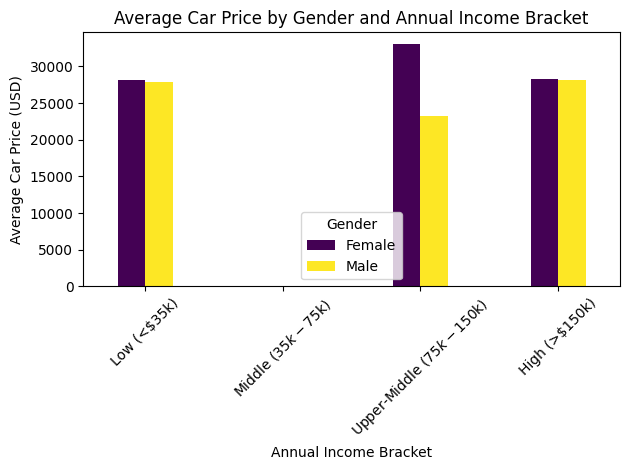

In [60]:
# How does the average selling price of cars vary by customer gender and annual income?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Clean data: handle null values and ensure numeric types
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce').fillna(df['Price ($)'].median())
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce').fillna(df['Annual Income'].median())
df['Gender'] = df['Gender'].fillna('Unknown')
df['Price ($)'] = df['Price ($)'].clip(lower=0)  # Ensure non-negative prices
df['Annual Income'] = df['Annual Income'].clip(lower=0)  # Ensure non-negative income

# Define income brackets
bins = [0, 35000, 75000, 150000, float('inf')]
labels = ['Low (<$35k)', 'Middle ($35k-$75k)', 'Upper-Middle ($75k-$150k)', 'High (>$150k)']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, include_lowest=True)

# Calculate average price by gender and income bracket
avg_price = df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().reset_index().round(2)
print("\nAverage Car Prices by Gender and Income Bracket:")
print(avg_price.to_string(index=False))

# Pivot table for visualization
pivot_table = avg_price.pivot(index='Income_Bracket', columns='Gender', values='Price ($)')

# Grouped bar plot
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', colormap='viridis', width=0.4)
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price (USD)')
plt.title('Average Car Price by Gender and Annual Income Bracket')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show plot
plt.savefig('car_price_by_gender_income_barplot.png')
plt.show()

In [12]:
# What is the distribution of car prices by region, and how does the number of cars sold vary by region

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Price ($) and Dealer_Region
missing_price = df['Price ($)'].isna().sum()
missing_region = df['Dealer_Region'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Dealer_Region = {missing_region}")

# Group by Dealer_Region and calculate descriptive statistics for Price ($)
region_dist = df.groupby('Dealer_Region')['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
region_dist['IQR'] = region_dist['q3'] - region_dist['q1']

# Calculate percentage of total sales
total_cars = region_dist['count'].sum()
region_dist['percentage'] = (region_dist['count'] / total_cars * 100).round(2)

# Round numerical columns for readability
for col in ['mean', 'median', 'min', 'max', 'q1', 'q3', 'IQR']:
    region_dist[col] = region_dist[col].round(2)

# Sort by mean price for price distribution comparison
region_dist_price = region_dist.sort_values('mean', ascending=False)

# Print price distribution
print("\nPrice Distribution by Region (Sorted by Mean Price):")
print(region_dist_price)

# Sort by count for sales volume comparison
region_dist_sales = region_dist.sort_values('count', ascending=False)

# Print sales volume distribution
print("\nNumber of Cars Sold by Region (Sorted by Count):")
print(region_dist_sales[['Dealer_Region', 'count', 'percentage']])

# Summary statistics
print("\nSummary of Price and Sales Distribution:")
print(f"Total Cars Sold: {total_cars}")
print(f"Number of Regions: {len(region_dist)}")
print(f"Highest Mean Price: {region_dist['mean'].max():.2f} USD (Region: {region_dist.loc[region_dist['mean'].idxmax(), 'Dealer_Region']})")
print(f"Lowest Mean Price: {region_dist['mean'].min():.2f} USD (Region: {region_dist.loc[region_dist['mean'].idxmin(), 'Dealer_Region']})")
print(f"Highest IQR: {region_dist['IQR'].max():.2f} USD (Region: {region_dist.loc[region_dist['IQR'].idxmax(), 'Dealer_Region']})")
print(f"Lowest IQR: {region_dist['IQR'].min():.2f} USD (Region: {region_dist.loc[region_dist['IQR'].idxmin(), 'Dealer_Region']})")
print(f"Highest Sales Volume: {region_dist['count'].max()} cars ({region_dist.loc[region_dist['count'].idxmax(), 'percentage']:.2f}%, Region: {region_dist.loc[region_dist['count'].idxmax(), 'Dealer_Region']})")
print(f"Lowest Sales Volume: {region_dist['count'].min()} cars ({region_dist.loc[region_dist['count'].idxmin(), 'percentage']:.2f}%, Region: {region_dist.loc[region_dist['count'].idxmin(), 'Dealer_Region']})")

# Optional: Analyze body styles by region to explain price and sales differences
body_style_dist = df.groupby(['Dealer_Region', 'Body Style'])['Price ($)'].agg(['count', 'mean']).reset_index()
body_style_dist['mean'] = body_style_dist['mean'].round(2)
print("\nCount and Mean Price by Region and Body Style:")
print(body_style_dist.sort_values(['Dealer_Region', 'mean'], ascending=[True, False]))

# Save results to CSV
region_dist.to_csv('region_price_sales_distribution.csv', index=False)
print("\nResults saved as 'region_price_sales_distribution.csv'")

Missing values: Price ($) = 0, Dealer_Region = 0

Price Distribution by Region (Sorted by Mean Price):
  Dealer_Region  count      mean   median   min    max       q1       q3  \
1        Austin   4135  28341.60  23801.0  9000  85601  18001.0  35001.0   
0        Aurora   3130  28334.63  23000.0  9000  85800  18001.0  35000.0   
2    Greenville   3128  28180.82  22500.0  1200  85200  18001.0  34500.0   
5         Pasco   3131  28119.04  23000.0  9000  85600  18500.5  34000.0   
6    Scottsdale   3433  27954.96  22600.0  1450  85001  18000.0  33500.0   
4    Middletown   3128  27856.34  22750.0  1700  85300  18000.0  34000.0   
3    Janesville   3821  27833.35  23000.0  4300  85400  18001.0  34000.0   

       IQR  percentage  
1  17000.0       17.30  
0  16999.0       13.09  
2  16499.0       13.08  
5  15499.5       13.10  
6  15500.0       14.36  
4  16000.0       13.08  
3  15999.0       15.98  

Number of Cars Sold by Region (Sorted by Count):
  Dealer_Region  count  percentage
1  

In [13]:
# How does the average car price differ between cars with different engine sizes

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Price ($) and Engine
missing_price = df['Price ($)'].isna().sum()
missing_engine = df['Engine'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Engine = {missing_engine}")

# Group by Engine and calculate statistics for Price ($)
engine_price_stats = df.groupby('Engine')['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
engine_price_stats['IQR'] = engine_price_stats['q3'] - engine_price_stats['q1']

# Round numerical columns for readability
for col in ['mean', 'median', 'std', 'min', 'max', 'q1', 'q3', 'IQR']:
    engine_price_stats[col] = engine_price_stats[col].round(2)

# Sort by mean price for comparison
engine_price_stats = engine_price_stats.sort_values('mean', ascending=False)

# Print the price statistics by engine type
print("\nPrice Statistics by Engine Type (Sorted by Mean Price):")
print(engine_price_stats)

# Summary statistics
print("\nSummary of Average Price by Engine Type:")
print(f"Number of Engine Types: {len(engine_price_stats)}")
print(f"Highest Mean Price: {engine_price_stats['mean'].max():.2f} USD (Engine: {engine_price_stats.iloc[0]['Engine']})")
print(f"Lowest Mean Price: {engine_price_stats['mean'].min():.2f} USD (Engine: {engine_price_stats.iloc[-1]['Engine']})")
print(f"Range of Mean Prices: {engine_price_stats['mean'].max() - engine_price_stats['mean'].min():.2f} USD")

# Optional: Analyze body styles by engine type to explain price differences
body_style_engine = df.groupby(['Engine', 'Body Style'])['Price ($)'].agg(['count', 'mean']).reset_index()
body_style_engine['mean'] = body_style_engine['mean'].round(2)
print("\nCount and Mean Price by Engine Type and Body Style:")
print(body_style_engine.sort_values(['Engine', 'mean'], ascending=[True, False]))

# Save results to CSV
engine_price_stats.to_csv('engine_price_stats.csv', index=False)
print("\nResults saved as 'engine_price_stats.csv'")

Missing values: Price ($) = 0, Engine = 0

Price Statistics by Engine Type (Sorted by Mean Price):
                      Engine  count      mean   median       std   min    max  \
0  DoubleÂ Overhead Camshaft  12571  28248.53  24000.0  13747.07  1200  75700   
1          Overhead Camshaft  11335  27914.71  22001.0  15862.87  1700  85800   

        q1       q3      IQR  
0  19000.0  35500.0  16500.0  
1  17000.0  34000.0  17000.0  

Summary of Average Price by Engine Type:
Number of Engine Types: 2
Highest Mean Price: 28248.53 USD (Engine: DoubleÂ Overhead Camshaft)
Lowest Mean Price: 27914.71 USD (Engine: Overhead Camshaft)
Range of Mean Prices: 333.82 USD

Count and Mean Price by Engine Type and Body Style:
                      Engine Body Style  count      mean
0  DoubleÂ Overhead Camshaft    Hardtop   1408  31520.19
4  DoubleÂ Overhead Camshaft      Sedan   2599  29955.29
2  DoubleÂ Overhead Camshaft  Passenger   2020  28915.84
3  DoubleÂ Overhead Camshaft        SUV   3086  27501

<ipython-input-58-0d93212f8ddb>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_stats = df.groupby('Income_Bracket')['Price ($)'].describe().round(2)
<ipython-input-58-0d93212f8ddb>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Income_Bracket', y='Price ($)', palette='viridis')



Summary Statistics of Car Prices by Income Bracket:
                             count      mean       std      min      50%      max
Income_Bracket                                                                   
Low (<$35k)                 5275.0  27884.30  14909.07   1200.0  22001.0  85001.0
Middle ($35k-$75k)             0.0       NaN       NaN      NaN      NaN      NaN
Upper-Middle ($75k-$150k)      6.0  26500.17  14124.72  14000.0  19500.0  46001.0
High (>$150k)              18625.0  28149.09  14754.84   1450.0  23000.0  85800.0


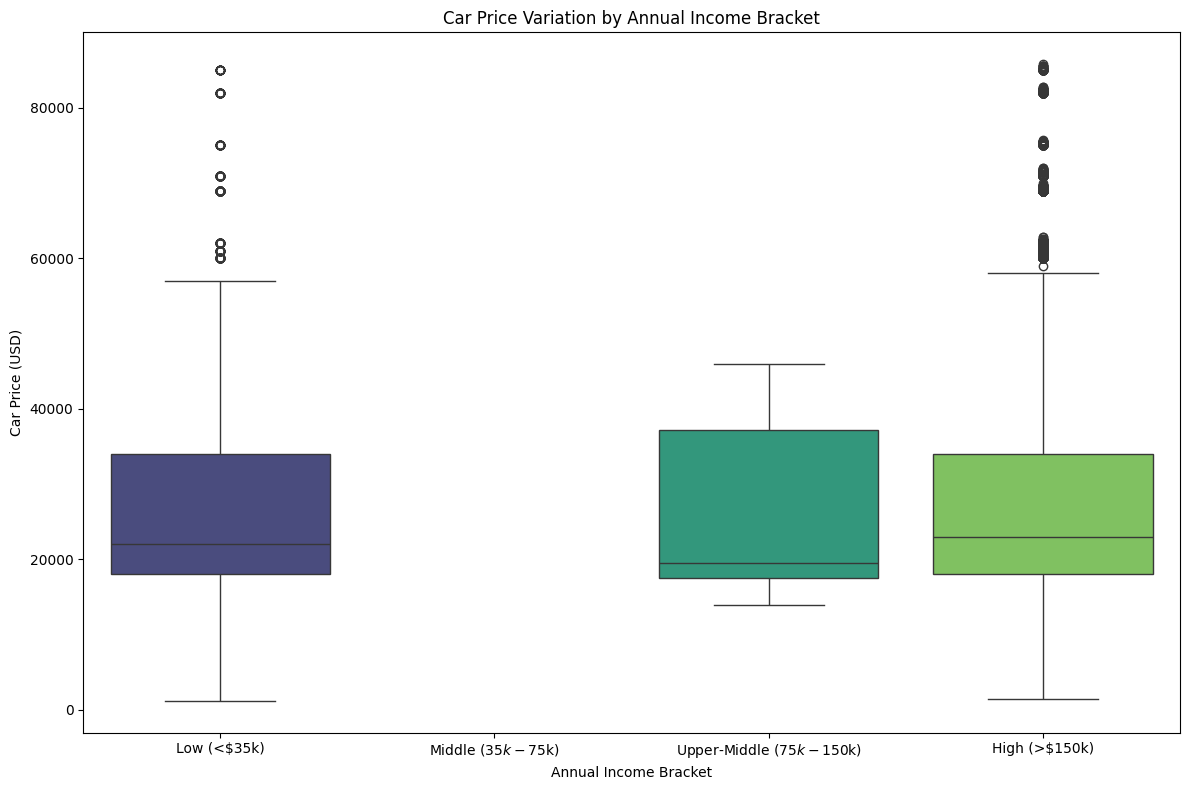

In [58]:
# How do car prices vary based on the customer’s annual income bracket

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Clean data: handle null values and ensure numeric types
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce').fillna(df['Price ($)'].median())
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce').fillna(df['Annual Income'].median())
df['Price ($)'] = df['Price ($)'].clip(lower=0)  # Ensure non-negative prices
df['Annual Income'] = df['Annual Income'].clip(lower=0)  # Ensure non-negative income

# Define income brackets
bins = [0, 35000, 75000, 150000, float('inf')]
labels = ['Low (<$35k)', 'Middle ($35k-$75k)', 'Upper-Middle ($75k-$150k)', 'High (>$150k)']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, include_lowest=True)

# Summary statistics by income bracket
price_stats = df.groupby('Income_Bracket')['Price ($)'].describe().round(2)
print("\nSummary Statistics of Car Prices by Income Bracket:")
print(price_stats[['count', 'mean', 'std', 'min', '50%', 'max']].to_string())

# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Income_Bracket', y='Price ($)', palette='viridis')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Car Price (USD)')
plt.title('Car Price Variation by Annual Income Bracket')
plt.tight_layout()

# Save and show plot
plt.savefig('car_price_by_income_boxplot.png')
plt.show()

In [15]:
# What are the top 5 car models with the highest number of sales, and how does their price distribution look

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Model and Price ($)
missing_model = df['Model'].isna().sum()
missing_price = df['Price ($)'].isna().sum()
print(f"Missing values: Model = {missing_model}, Price ($) = {missing_price}")

# Get top 5 models by sales count
model_sales = df['Model'].value_counts().reset_index()
model_sales.columns = ['Model', 'Sales_Count']
top_5_models = model_sales.head(5)
print("\nTop 5 Car Models by Sales:")
print(top_5_models)

# Filter dataset for top 5 models
top_5_model_names = top_5_models['Model'].tolist()
top_5_df = df[df['Model'].isin(top_5_model_names)]

# Group by Model and calculate price statistics
price_stats = top_5_df.groupby('Model')['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
price_stats['IQR'] = price_stats['q3'] - price_stats['q1']

# Round numerical columns
for col in ['mean', 'median', 'std', 'min', 'max', 'q1', 'q3', 'IQR']:
    price_stats[col] = price_stats[col].round(2)

# Sort by sales count (merge with top_5_models to preserve order)
price_stats = price_stats.merge(top_5_models, on='Model').sort_values('Sales_Count', ascending=False)

# Print price distribution
print("\nPrice Distribution for Top 5 Car Models:")
print(price_stats)

# Summary statistics
print("\nSummary of Top 5 Models:")
print(f"Total Sales in Top 5: {price_stats['count'].sum()} ({price_stats['count'].sum()/len(df)*100:.2f}% of dataset)")
print(f"Highest Sales Model: {price_stats.iloc[0]['Model']} ({price_stats.iloc[0]['count']} sales)")
print(f"Highest Mean Price: {price_stats['mean'].max():.2f} USD (Model: {price_stats.loc[price_stats['mean'].idxmax(), 'Model']})")
print(f"Lowest Mean Price: {price_stats['mean'].min():.2f} USD (Model: {price_stats.loc[price_stats['mean'].idxmin(), 'Model']})")

# Optional: Analyze body style and engine for context
model_details = top_5_df.groupby(['Model', 'Body Style', 'Engine'])['Price ($)'].agg(['count', 'mean']).reset_index()
model_details['mean'] = model_details['mean'].round(2)
print("\nDetails by Model, Body Style, and Engine:")
print(model_details.sort_values(['Model', 'mean'], ascending=[True, False]))

# Save results to CSV
price_stats.to_csv('top_5_models_price_distribution.csv', index=False)
print("\nResults saved as 'top_5_models_price_distribution.csv'")

Missing values: Model = 0, Price ($) = 0

Top 5 Car Models by Sales:
        Model  Sales_Count
0    Diamante          418
1       Prizm          411
2  Silhouette          411
3      Passat          391
4  Ram Pickup          383

Price Distribution for Top 5 Car Models:
        Model  count      mean   median       std    min    max       q1  \
0    Diamante    418  22268.30  19001.0   9770.77  12000  49801  18000.0   
2       Prizm    411  22838.46  22000.0   8012.53  15000  44700  16000.0   
4  Silhouette    411  29858.51  25000.0  17940.57  12000  60750  14001.0   
1      Passat    391  19600.73  20000.0   8218.52   9000  32501  12001.0   
3  Ram Pickup    383  27820.86  21000.0  13297.61  16000  57750  19000.0   

        q3      IQR  Sales_Count  
0  22000.0   4000.0          418  
2  25000.0   9000.0          411  
4  34500.0  20499.0          411  
1  27001.0  15000.0          391  
3  39300.0  20300.0          383  

Summary of Top 5 Models:
Total Sales in Top 5: 2014 (8.42% 

In [16]:
# How does car price vary with engine size across different car colors, and which colors have the highest price variation

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values
missing_price = df['Price ($)'].isna().sum()
missing_engine = df['Engine'].isna().sum()
missing_color = df['Color'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Engine = {missing_engine}, Color = {missing_color}")

# Group by Engine and Color to analyze price variation
engine_color_price = df.groupby(['Engine', 'Color'])['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
engine_color_price['IQR'] = engine_color_price['q3'] - engine_color_price['q1']

# Round numerical columns
for col in ['mean', 'median', 'std', 'min', 'max', 'q1', 'q3', 'IQR']:
    engine_color_price[col] = engine_color_price[col].round(2)

# Sort by Engine and mean price
engine_color_price = engine_color_price.sort_values(['Engine', 'mean'], ascending=[True, False])
print("\nPrice Statistics by Engine Type and Color (Sorted by Engine and Mean Price):")
print(engine_color_price)

# Group by Color to find highest price variation
color_price_variation = df.groupby('Color')['Price ($)'].agg(
    count='count',
    mean='mean',
    std='std'
).reset_index()

# Round numerical columns
color_price_variation['mean'] = color_price_variation['mean'].round(2)
color_price_variation['std'] = color_price_variation['std'].round(2)

# Sort by standard deviation (price variation)
color_price_variation = color_price_variation.sort_values('std', ascending=False)
print("\nPrice Variation by Color (Sorted by Standard Deviation):")
print(color_price_variation)

# Summary statistics
print("\nSummary of Price Variation:")
print(f"Number of Colors: {len(color_price_variation)}")
print(f"Highest Price Variation: {color_price_variation['std'].max():.2f} USD (Color: {color_price_variation.iloc[0]['Color']})")
print(f"Lowest Price Variation: {color_price_variation['std'].min():.2f} USD (Color: {color_price_variation.iloc[-1]['Color']})")
print(f"Highest Mean Price: {color_price_variation['mean'].max():.2f} USD (Color: {color_price_variation.loc[color_price_variation['mean'].idxmax(), 'Color']})")
print(f"Lowest Mean Price: {color_price_variation['mean'].min():.2f} USD (Color: {color_price_variation.loc[color_price_variation['mean'].idxmin(), 'Color']})")

# Optional: Analyze body styles by color to explain variation
body_style_color = df.groupby(['Color', 'Body Style'])['Price ($)'].agg(['count', 'mean']).reset_index()
body_style_color['mean'] = body_style_color['mean'].round(2)
print("\nCount and Mean Price by Color and Body Style:")
print(body_style_color.sort_values(['Color', 'mean'], ascending=[True, False]))

# Save results to CSV
engine_color_price.to_csv('engine_color_price_stats.csv', index=False)
color_price_variation.to_csv('color_price_variation.csv', index=False)
print("\nResults saved as 'engine_color_price_stats.csv' and 'color_price_variation.csv'")

Missing values: Price ($) = 0, Engine = 0, Color = 0

Price Statistics by Engine Type and Color (Sorted by Engine and Mean Price):
                      Engine       Color  count      mean   median       std  \
1  DoubleÂ Overhead Camshaft  Pale White   5901  30347.99  25500.0  14402.41   
2  DoubleÂ Overhead Camshaft         Red   2498  27434.39  22055.5  13499.35   
0  DoubleÂ Overhead Camshaft       Black   4172  25766.45  23000.0  12418.67   
3          Overhead Camshaft       Black   3685  31732.97  26000.0  17457.41   
5          Overhead Camshaft         Red   2295  30153.41  24000.0  17346.64   
4          Overhead Camshaft  Pale White   5355  24327.77  21001.0  13000.10   

     min    max       q1        q3       IQR  
1   4200  75700  19001.0  41001.00  22000.00  
2   1450  69980  19000.0  31788.25  12788.25  
0   1200  61500  18000.0  28501.00  10501.00  
3   1700  85800  18000.0  43000.00  25000.00  
5  11000  82600  20000.0  34000.00  14000.00  
4  11000  82800  16000.0  

In [17]:
# Is there any seasonal trend in car sales based on the date of sale

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values in Date
missing_date = df['Date'].isna().sum()
print(f"Missing values in Date: {missing_date}")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month and define seasons
df['Month'] = df['Date'].dt.month_name()
df['Season'] = df['Date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Group by Season and Month to analyze sales and price
season_sales = df.groupby('Season').agg(
    Sales_Count=('Car_id', 'count'),
    Mean_Price=('Price ($)', 'mean'),
    Median_Price=('Price ($)', 'median')
).reset_index()

month_sales = df.groupby('Month').agg(
    Sales_Count=('Car_id', 'count'),
    Mean_Price=('Price ($)', 'mean'),
    Median_Price=('Price ($)', 'median')
).reset_index()

# Round price columns
season_sales[['Mean_Price', 'Median_Price']] = season_sales[['Mean_Price', 'Median_Price']].round(2)
month_sales[['Mean_Price', 'Median_Price']] = month_sales[['Mean_Price', 'Median_Price']].round(2)

# Sort seasons (Winter, Spring, Summer, Fall)
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_sales['Season'] = pd.Categorical(season_sales['Season'], categories=season_order, ordered=True)
season_sales = season_sales.sort_values('Season')

# Sort months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_sales['Month'] = pd.Categorical(month_sales['Month'], categories=month_order, ordered=True)
month_sales = month_sales.sort_values('Month')

# Print results
print("\nCar Sales by Season:")
print(season_sales)
print("\nCar Sales by Month:")
print(month_sales)

# Summary statistics
print("\nSummary of Seasonal Trends:")
print(f"Total Sales: {season_sales['Sales_Count'].sum()} (100% of dataset)")
print(f"Highest Sales Season: {season_sales.loc[season_sales['Sales_Count'].idxmax(), 'Season']} "
      f"({season_sales['Sales_Count'].max()} sales, {season_sales['Sales_Count'].max()/season_sales['Sales_Count'].sum()*100:.2f}%)")
print(f"Lowest Sales Season: {season_sales.loc[season_sales['Sales_Count'].idxmin(), 'Season']} "
      f"({season_sales['Sales_Count'].min()} sales, {season_sales['Sales_Count'].min()/season_sales['Sales_Count'].sum()*100:.2f}%)")
print(f"Highest Mean Price: {season_sales['Mean_Price'].max():.2f} USD (Season: {season_sales.loc[season_sales['Mean_Price'].idxmax(), 'Season']})")
print(f"Lowest Mean Price: {season_sales['Mean_Price'].min():.2f} USD (Season: {season_sales.loc[season_sales['Mean_Price'].idxmin(), 'Season']})")

# Optional: Analyze body styles by season
body_style_season = df.groupby(['Season', 'Body Style'])['Price ($)'].agg(['count', 'mean']).reset_index()
body_style_season['mean'] = body_style_season['mean'].round(2)
print("\nSales Count and Mean Price by Season and Body Style:")
print(body_style_season.sort_values(['Season', 'mean'], ascending=[True, False]))

# Save results to CSV
season_sales.to_csv('season_sales_trends.csv', index=False)
month_sales.to_csv('month_sales_trends.csv', index=False)
print("\nResults saved as 'season_sales_trends.csv' and 'month_sales_trends.csv'")

Missing values in Date: 0

Car Sales by Season:
   Season  Sales_Count  Mean_Price  Median_Price
3  Winter         5071    27924.71       22700.0
1  Spring         5085    27884.28       22500.0
2  Summer         5145    28275.52       23501.0
0    Fall         8605    28198.74       23000.0

Car Sales by Month:
        Month  Sales_Count  Mean_Price  Median_Price
4     January          790    27463.57       22001.0
3    February          735    28087.00       22500.0
7       March         1535    27169.95       22001.0
0       April         1655    28316.88       23000.0
8         May         1895    28085.09       22700.0
6        June         1715    28283.32       23000.0
5        July         1725    27929.29       23000.0
1      August         1705    28617.97       24000.0
11  September         3305    28331.37       24000.0
10    October         1830    28434.57       23900.5
9    November         3470    27948.03       22200.5
2    December         3546    27993.81       23000

In [18]:
# How does the car price distribution change when considering different combinations of body style and transmission type

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values
missing_price = df['Price ($)'].isna().sum()
missing_body_style = df['Body Style'].isna().sum()
missing_transmission = df['Transmission'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Body Style = {missing_body_style}, Transmission = {missing_transmission}")

# Group by Body Style and Transmission to analyze price distribution
price_dist = df.groupby(['Body Style', 'Transmission'])['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
price_dist['IQR'] = price_dist['q3'] - price_dist['q1']

# Round numerical columns
for col in ['mean', 'median', 'std', 'min', 'max', 'q1', 'q3', 'IQR']:
    price_dist[col] = price_dist[col].round(2)

# Sort by mean price for comparison
price_dist = price_dist.sort_values('mean', ascending=False)

# Print price distribution
print("\nPrice Distribution by Body Style and Transmission (Sorted by Mean Price):")
print(price_dist)

# Summary statistics
print("\nSummary of Price Distribution:")
print(f"Total Cars: {price_dist['count'].sum()} (100% of dataset)")
print(f"Number of Combinations: {len(price_dist)}")
print(f"Highest Mean Price: {price_dist['mean'].max():.2f} USD "
      f"(Body Style: {price_dist.iloc[0]['Body Style']}, Transmission: {price_dist.iloc[0]['Transmission']})")
print(f"Lowest Mean Price: {price_dist['mean'].min():.2f} USD "
      f"(Body Style: {price_dist.iloc[-1]['Body Style']}, Transmission: {price_dist.iloc[-1]['Transmission']})")
print(f"Highest Price Variation (std): {price_dist['std'].max():.2f} USD "
      f"(Body Style: {price_dist.loc[price_dist['std'].idxmax(), 'Body Style']}, "
      f"Transmission: {price_dist.loc[price_dist['std'].idxmax(), 'Transmission']})")
print(f"Highest IQR: {price_dist['IQR'].max():.2f} USD "
      f"(Body Style: {price_dist.loc[price_dist['IQR'].idxmax(), 'Body Style']}, "
      f"Transmission: {price_dist.loc[price_dist['IQR'].idxmax(), 'Transmission']})")

# Optional: Analyze by region to contextualize
region_body_trans = df.groupby(['Dealer_Region', 'Body Style', 'Transmission'])['Price ($)'].agg(['count', 'mean']).reset_index()
region_body_trans['mean'] = region_body_trans['mean'].round(2)
print("\nCount and Mean Price by Region, Body Style, and Transmission:")
print(region_body_trans.sort_values(['Dealer_Region', 'mean'], ascending=[True, False]))

# Save results to CSV
price_dist.to_csv('body_style_transmission_price_dist.csv', index=False)
print("\nResults saved as 'body_style_transmission_price_dist.csv'")

Missing values: Price ($) = 0, Body Style = 0, Transmission = 0

Price Distribution by Body Style and Transmission (Sorted by Mean Price):
  Body Style Transmission  count      mean   median       std    min    max  \
0    Hardtop         Auto   1408  31520.19  27000.0  13687.76  12000  75501   
8      Sedan         Auto   2599  29955.29  26000.0  14310.91  12000  69980   
9      Sedan       Manual   1889  29664.27  25000.0  15440.06  11000  69700   
5  Passenger       Manual   1925  28969.52  22000.0  18523.68  10000  85800   
4  Passenger         Auto   2020  28915.84  25000.0  13946.48   9000  69801   
3  Hatchback       Manual   2670  28702.55  23000.0  16284.05   1700  85600   
6        SUV         Auto   3086  27501.40  25000.0  13299.93   1200  75501   
1    Hardtop       Manual   1563  27016.94  22001.0  14072.50  11000  82500   
7        SUV       Manual   3288  26079.02  22000.0  14621.53   2200  85500   
2  Hatchback         Auto   3458  25910.54  21500.0  13144.01   4200  7

In [19]:
# What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

# Import required libraries
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values
missing_price = df['Price ($)'].isna().sum()
missing_engine = df['Engine'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Engine = {missing_engine}")

# Encode Engine type (DOHC = 1, OHC = 0) for correlation analysis
df['Engine_Binary'] = df['Engine'].map({'Double Overhead Camshaft': 1, 'Overhead Camshaft': 0})

# Check for missing values after encoding
missing_engine_binary = df['Engine_Binary'].isna().sum()
print(f"Missing values in Engine_Binary: {missing_engine_binary}")

# Calculate point-biserial correlation between Price ($) and Engine type
if missing_engine_binary == 0:
    corr_price_engine, p_value = pointbiserialr(df['Engine_Binary'], df['Price ($)'])
    print(f"\nPoint-Biserial Correlation (Price vs. Engine Type): {corr_price_engine:.4f}, p-value: {p_value:.4f}")
else:
    print("\nCannot compute correlation due to missing Engine_Binary values")

# Group by Engine to analyze price distribution
engine_price_stats = df.groupby('Engine')['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()
engine_price_stats['IQR'] = engine_price_stats['q3'] - engine_price_stats['q1']
engine_price_stats = engine_price_stats.round(2)
print("\nPrice Statistics by Engine Type:")
print(engine_price_stats)

# Hypothetical income analysis (if income were available)
# Example: Group by hypothetical income brackets and Engine
# df['Income_Bracket'] = pd.cut(df['Annual_Income'], bins=[0, 25000, 50000, 100000, float('inf')],
#                               labels=['<25k', '25k-50k', '50k-100k', '>100k'])
# income_engine_price = df.groupby(['Income_Bracket', 'Engine'])['Price ($)'].agg(['count', 'mean']).reset_index()

# Analyze Body Style and Engine interactions with Price
body_engine_price = df.groupby(['Body Style', 'Engine'])['Price ($)'].agg(
    count='count',
    mean='mean',
    std='std'
).reset_index()
body_engine_price[['mean', 'std']] = body_engine_price[['mean', 'std']].round(2)
print("\nPrice Statistics by Body Style and Engine Type:")
print(body_engine_price.sort_values('mean', ascending=False))

# Save results
engine_price_stats.to_csv('engine_price_stats.csv', index=False)
body_engine_price.to_csv('body_engine_price_stats.csv', index=False)
print("\nResults saved as 'engine_price_stats.csv' and 'body_engine_price_stats.csv'")

Missing values: Price ($) = 0, Engine = 0
Missing values in Engine_Binary: 12571

Cannot compute correlation due to missing Engine_Binary values

Price Statistics by Engine Type:
                      Engine  count      mean   median       std   min    max  \
0  DoubleÂ Overhead Camshaft  12571  28248.53  24000.0  13747.07  1200  75700   
1          Overhead Camshaft  11335  27914.71  22001.0  15862.87  1700  85800   

        q1       q3      IQR  
0  19000.0  35500.0  16500.0  
1  17000.0  34000.0  17000.0  

Price Statistics by Body Style and Engine Type:
  Body Style                     Engine  count      mean       std
0    Hardtop  DoubleÂ Overhead Camshaft   1408  31520.19  13687.76
8      Sedan  DoubleÂ Overhead Camshaft   2599  29955.29  14310.91
9      Sedan          Overhead Camshaft   1889  29664.27  15440.06
5  Passenger          Overhead Camshaft   1925  28969.52  18523.68
4  Passenger  DoubleÂ Overhead Camshaft   2020  28915.84  13946.48
3  Hatchback          Overhead Ca

In [20]:
# How does the average car price vary across different car models and engine types

# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Check for missing values
missing_price = df['Price ($)'].isna().sum()
missing_model = df['Model'].isna().sum()
missing_engine = df['Engine'].isna().sum()
print(f"Missing values: Price ($) = {missing_price}, Model = {missing_model}, Engine = {missing_engine}")

# Group by Model and Engine to analyze price distribution
model_engine_price = df.groupby(['Model', 'Engine'])['Price ($)'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate IQR (Q3 - Q1)
model_engine_price['IQR'] = model_engine_price['q3'] - model_engine_price['q1']

# Round numerical columns
for col in ['mean', 'median', 'std', 'min', 'max', 'q1', 'q3', 'IQR']:
    model_engine_price[col] = model_engine_price[col].round(2)

# Sort by mean price for comparison
model_engine_price = model_engine_price.sort_values('mean', ascending=False)

# Print price distribution
print("\nPrice Distribution by Model and Engine Type (Sorted by Mean Price):")
print(model_engine_price)

# Summary statistics
print("\nSummary of Price Variation:")
print(f"Total Cars: {model_engine_price['count'].sum()} (100% of dataset)")
print(f"Number of Model-Engine Combinations: {len(model_engine_price)}")
print(f"Highest Mean Price: {model_engine_price['mean'].max():.2f} USD "
      f"(Model: {model_engine_price.iloc[0]['Model']}, Engine: {model_engine_price.iloc[0]['Engine']})")
print(f"Lowest Mean Price: {model_engine_price['mean'].min():.2f} USD "
      f"(Model: {model_engine_price.iloc[-1]['Model']}, Engine: {model_engine_price.iloc[-1]['Engine']})")
print(f"Highest Price Variation (std): {model_engine_price['std'].max():.2f} USD "
      f"(Model: {model_engine_price.loc[model_engine_price['std'].idxmax(), 'Model']}, "
      f"Engine: {model_engine_price.loc[model_engine_price['std'].idxmax(), 'Engine']})")

# Optional: Analyze body style for context
body_model_engine = df.groupby(['Body Style', 'Model', 'Engine'])['Price ($)'].agg(['count', 'mean']).reset_index()
body_model_engine['mean'] = body_model_engine['mean'].round(2)
print("\nCount and Mean Price by Body Style, Model, and Engine Type:")
print(body_model_engine.sort_values('mean', ascending=False))

# Save results to CSV
model_engine_price.to_csv('model_engine_price_stats.csv', index=False)
print("\nResults saved as 'model_engine_price_stats.csv'")

Missing values: Price ($) = 0, Model = 0, Engine = 0

Price Distribution by Model and Engine Type (Sorted by Mean Price):
        Model                     Engine  count      mean   median       std  \
212        SC          Overhead Camshaft     55  61074.82  61000.0    178.45   
198    Ranger  DoubleÂ Overhead Camshaft     36  61064.06  61000.0    164.08   
222     Sable          Overhead Camshaft     48  61039.77  61000.0    133.28   
56     Catera  DoubleÂ Overhead Camshaft     90  56836.93  75000.0  23035.04   
143     LX470          Overhead Camshaft     51  54037.49  54000.0    124.77   
..        ...                        ...    ...       ...      ...       ...   
15         A4          Overhead Camshaft     50  12046.22  12000.0    144.59   
241    Taurus  DoubleÂ Overhead Camshaft     26  11665.54  12000.0   2144.41   
98     Escort          Overhead Camshaft     45  11403.87  11001.0    525.33   
129  Intrepid          Overhead Camshaft     51  11069.88  11000.0    173.46  

## EDA 3

In [21]:
# What is the average rating for each product category

import pandas as pd

# Load the dataset (simulating the provided data)
df = pd.read_csv('amazon.csv')

# Extract top-level category
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Ensure rating is numeric and valid
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by top_category and compute average rating and count
avg_rating_by_category = df.groupby('top_category')['rating'].agg(['mean', 'count']).reset_index()
avg_rating_by_category['mean'] = avg_rating_by_category['mean'].round(2)

# Rename columns for clarity
avg_rating_by_category.columns = ['Category', 'Average Rating', 'Product Count']

# Print results
print("\nAverage Rating by Product Category:")
print(avg_rating_by_category.to_string(index=False))


Average Rating by Product Category:
             Category  Average Rating  Product Count
        Car&Motorbike            3.80              1
Computers&Accessories            4.15            453
          Electronics            4.08            526
  Health&PersonalCare            4.00              1
         Home&Kitchen            4.04            447
      HomeImprovement            4.25              2
   MusicalInstruments            3.90              2
       OfficeProducts            4.31             31
           Toys&Games            4.30              1


In [26]:
# What are the top rating_count products by category

import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Extract top-level category
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Convert rating_count to integer (remove commas)
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce').astype('Int64')

# Group by top_category and find the product with max rating_count
top_rating_count = df.loc[df.groupby('top_category')['rating_count'].idxmax()][['top_category', 'product_name', 'rating_count', 'rating']].reset_index(drop=True)

# Format rating_count with commas for readability
top_rating_count['rating_count'] = top_rating_count['rating_count'].apply(lambda x: f"{x:,}")

# Rename columns for clarity
top_rating_count.columns = ['Category', 'Product Name', 'Rating Count', 'Rating']

# Print results
print("\nTop Rating Count Products by Category:")
print(top_rating_count.to_string(index=False))


Top Rating Count Products by Category:
             Category                                                                                                                                                                                            Product Name Rating Count Rating
        Car&Motorbike                       Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black        1,118    3.8
Computers&Accessories                                                                                                                                                               SanDisk Cruzer Blade 32GB USB Flash Drive      253,105    4.3
          Electronics                                                                                                                               AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot      426,973


Summary Statistics for Discounted Price, Actual Price, and Discount Percentage:
                      count     mean  median       std   min       max
discounted_price     1465.0  3125.31   799.0   6944.30  39.0   77990.0
actual_price         1465.0  5444.99  1650.0  10874.83  39.0  139900.0
discount_percentage  1465.0    47.69    50.0     21.64   0.0      94.0


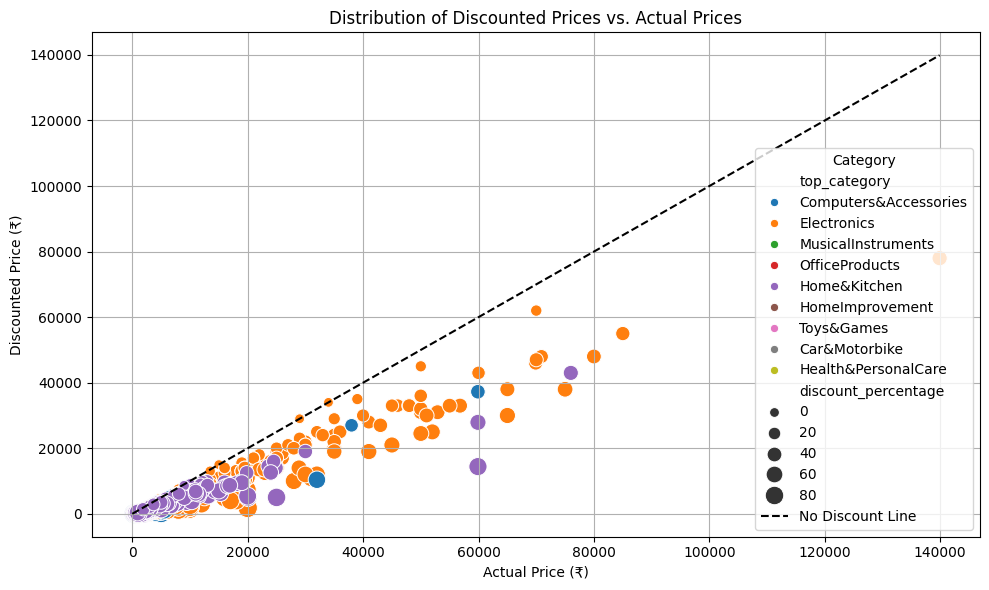


Top 5 Products by Discount Percentage:
                                                                                                                                                                                    product_name          top_category discounted_price actual_price discount_percentage
rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver Computers&Accessories          ₹294.00    ₹4,999.00                 94%
                                       Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution           Electronics        ₹1,799.00   ₹19,999.00                 91%
                                       Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 24

In [27]:
# What is the distribution of discounted prices vs. actual prices

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean price columns: remove '₹' and commas, convert to float
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Clean discount_percentage: remove '%' and convert to float
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Extract top-level category for color-coding
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Summary statistics
summary_stats = df[['discounted_price', 'actual_price', 'discount_percentage']].describe().round(2)
summary_stats = summary_stats.T  # Transpose for better display
summary_stats['median'] = df[['discounted_price', 'actual_price', 'discount_percentage']].median().round(2)

# Print summary statistics
print("\nSummary Statistics for Discounted Price, Actual Price, and Discount Percentage:")
print(summary_stats[['count', 'mean', 'median', 'std', 'min', 'max']].to_string())

# Scatter plot of discounted_price vs. actual_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', hue='top_category', size='discount_percentage', sizes=(50, 200))
plt.plot([0, df['actual_price'].max()], [0, df['actual_price'].max()], 'k--', label='No Discount Line')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# Save and show plot
plt.savefig('discounted_vs_actual_price.png')
plt.show()

# Print top 5 products by discount_percentage for context
top_discounts = df[['product_name', 'top_category', 'discounted_price', 'actual_price', 'discount_percentage']].sort_values(by='discount_percentage', ascending=False).head(5)
top_discounts['discounted_price'] = top_discounts['discounted_price'].apply(lambda x: f"₹{x:,.2f}")
top_discounts['actual_price'] = top_discounts['actual_price'].apply(lambda x: f"₹{x:,.2f}")
top_discounts['discount_percentage'] = top_discounts['discount_percentage'].apply(lambda x: f"{x:.0f}%")
print("\nTop 5 Products by Discount Percentage:")
print(top_discounts.to_string(index=False))

In [28]:
# How does the average discount percentage vary across categories

import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Extract top-level category
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Convert discount_percentage to float (remove '%')
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Group by top_category and compute average discount_percentage
avg_discount_by_category = df.groupby('top_category')['discount_percentage'].agg(['mean', 'count']).reset_index()
avg_discount_by_category['mean'] = avg_discount_by_category['mean'].round(2)

# Rename columns for clarity
avg_discount_by_category.columns = ['Category', 'Average Discount (%)', 'Product Count']

# Print results
print("\nAverage Discount Percentage by Product Category:")
print(avg_discount_by_category.to_string(index=False))


Average Discount Percentage by Product Category:
             Category  Average Discount (%)  Product Count
        Car&Motorbike                 42.00              1
Computers&Accessories                 54.02            453
          Electronics                 50.83            526
  Health&PersonalCare                 53.00              1
         Home&Kitchen                 40.12            448
      HomeImprovement                 57.50              2
   MusicalInstruments                 46.00              2
       OfficeProducts                 12.35             31
           Toys&Games                  0.00              1


In [30]:
# What are the most popular product names

import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert rating_count to integer (remove commas)
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Extract top-level category
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Sort by rating_count and select top 5
top_products = df[['product_name', 'top_category', 'rating_count', 'rating']].sort_values(by='rating_count', ascending=False).head(5)

# Format rating_count with commas for readability
top_products['rating_count'] = top_products['rating_count'].apply(lambda x: f"{x:,}")

# Rename columns for clarity
top_products.columns = ['Product Name', 'Category', 'Rating Count', 'Rating']

# Print results
print("\nTop 5 Most Popular Product Names by Rating Count:")
print(top_products.to_string(index=False))


Top 5 Most Popular Product Names by Rating Count:
                                                                       Product Name    Category Rating Count Rating
          AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot Electronics      426,973    4.4
                         Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black Electronics      426,973    4.4
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black Electronics      426,973    4.4
          AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot Electronics      426,972    4.4
                    boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red) Electronics      363,713    4.1


In [32]:
# What are the most popular product keywords

import pandas as pd
from collections import defaultdict
import re

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert rating_count to integer (remove commas)
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Function to clean and tokenize product names into keywords
def extract_keywords(text):
    # Convert to lowercase, remove special characters, and split
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    # Remove common stop words and short words
    stop_words = {'for', 'with', 'and', 'to', 'in', 'of', '1', '2', '3'}
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]
    return words

# Extract keywords for each product
df['keywords'] = df['product_name'].apply(extract_keywords)

# Create a dictionary to store keyword frequencies weighted by rating_count
keyword_counts = defaultdict(int)
for _, row in df.iterrows():
    for keyword in row['keywords']:
        keyword_counts[keyword] += row['rating_count']

# Convert to DataFrame and get top 5 keywords
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Weighted Rating Count'])
top_keywords = keyword_df.sort_values(by='Weighted Rating Count', ascending=False).head(5)

# Format Weighted Rating Count with commas
top_keywords['Weighted Rating Count'] = top_keywords['Weighted Rating Count'].apply(lambda x: f"{x:,}")

# Print results
print("\nTop 5 Most Popular Product Keywords by Weighted Rating Count:")
print(top_keywords.to_string(index=False))


Top 5 Most Popular Product Keywords by Weighted Rating Count:
Keyword Weighted Rating Count
  black            12,748,635
    usb             7,884,123
  cable             6,592,899
    ear             5,191,243
    mic             5,025,073


In [34]:
# What are the most popular product reviews

import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert rating_count to integer (remove commas)
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
# Extract top-level category
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Sort by rating_count and select top 3 products
top_products = df.sort_values(by='rating_count', ascending=False).head(3)

# Prepare reviews data
reviews = top_products[['product_name', 'top_category', 'rating_count', 'user_name', 'review_title', 'review_content']]

# Split user_name, review_title, and review_content (they are comma-separated for multiple reviews)
reviews_list = []
for _, row in reviews.iterrows():
    users = row['user_name'].split(',')
    titles = row['review_title'].split(',')
    contents = row['review_content'].split(',')
    for user, title, content in zip(users, titles, contents):
        reviews_list.append({
            'Product Name': row['product_name'],
            'Category': row['top_category'],
            'Rating Count': f"{row['rating_count']:,}",
            'User Name': user.strip(),
            'Review Title': title.strip(),
            'Review Content': content.strip()
        })

# Convert to DataFrame
reviews_df = pd.DataFrame(reviews_list)

# Print results
print("\nReviews for Top 3 Most Popular Products by Rating Count:")
print(reviews_df.to_string(index=False))


Reviews for Top 3 Most Popular Products by Rating Count:
                                                                       Product Name    Category Rating Count                 User Name                        Review Title                                                                                                                                                                                                          Review Content
          AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot Electronics      426,973            Rishav Gossain It's quite good and value for money I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.
          AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot Electronics      426,973       Shashank Mallamraju                          Works we


Pearson Correlation between Discounted Price and Rating:
Correlation: 0.1203


<ipython-input-40-f03416ed6481>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


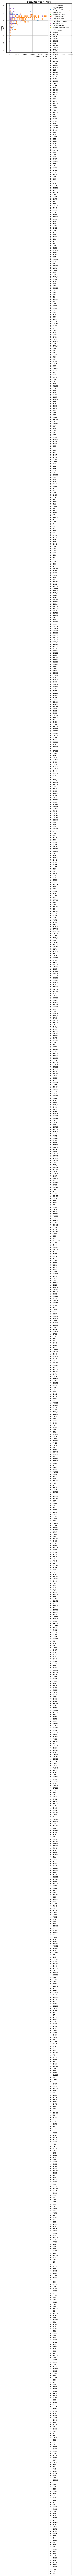

In [40]:
# What is the correlation between discounted_price and rating

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean discounted_price: remove '₹' and commas, convert to float
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Ensure rating is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Add this line to create the top_category column within the current cell's scope
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Calculate Pearson correlation
correlation = df['discounted_price'].corr(df['rating']).round(4)

# Print correlation
print("\nPearson Correlation between Discounted Price and Rating:")
print(f"Correlation: {correlation}")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating', hue='top_category', size='rating_count')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.title('Discounted Price vs. Rating')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# Save and show plot
plt.savefig('discounted_price_vs_rating.png')
plt.show()

In [41]:
#  What are the Top 5 categories based on the highest rating

import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Extract top-level category
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Ensure rating is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by top_category and compute average rating and count
avg_rating_by_category = df.groupby('top_category')['rating'].agg(['mean', 'count']).reset_index()
avg_rating_by_category['mean'] = avg_rating_by_category['mean'].round(2)

# Sort by average rating in descending order
top_categories = avg_rating_by_category.sort_values(by='mean', ascending=False).head(5)

# Rename columns for clarity
top_categories.columns = ['Category', 'Average Rating', 'Product Count']

# Print results
print("\nTop Categories by Highest Average Rating:")
print(top_categories.to_string(index=False))


Top Categories by Highest Average Rating:
             Category  Average Rating  Product Count
       OfficeProducts            4.31             31
           Toys&Games            4.30              1
      HomeImprovement            4.25              2
Computers&Accessories            4.15            453
          Electronics            4.08            526


In [43]:
#  Identify any potential areas for improvement or optimization based on the data analysis

import pandas as pd
import re

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean data
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# 1. Identify low-rated products (rating < 3.5)
low_rated = df[df['rating'] < 3.5][['product_name', 'top_category', 'rating', 'rating_count', 'review_content']]

# 2. Extract common negative keywords from reviews of low-rated products
def extract_negative_keywords(reviews):
    reviews = reviews.lower()
    negative_terms = ['poor', 'bad', 'not working', 'stopped', 'low quality', 'disappointed', 'issue', 'problem', 'cheap']
    found_terms = [term for term in negative_terms if term in reviews]
    return ', '.join(found_terms) if found_terms else 'None'

low_rated['negative_keywords'] = low_rated['review_content'].apply(extract_negative_keywords)

# 3. Category performance: average rating and discount
category_perf = df.groupby('top_category').agg({
    'rating': 'mean',
    'discount_percentage': 'mean',
    'rating_count': 'sum'
}).reset_index()
category_perf['rating'] = category_perf['rating'].round(2)
category_perf['discount_percentage'] = category_perf['discount_percentage'].round(2)

# 4. High discount, low rating products (discount > 50%, rating < 4.0)
high_discount_low_rating = df[(df['discount_percentage'] > 50) & (df['rating'] < 4.0)][['product_name', 'top_category', 'rating', 'discount_percentage']]

# Prepare recommendations
recommendations = []

# Low-rated products
for _, row in low_rated.iterrows():
    recommendations.append({
        'Area': 'Product Quality',
        'Issue': f"Low rating ({row['rating']}) for {row['product_name']}",
        'Recommendation': f"Investigate quality issues (negative feedback: {row['negative_keywords']}) and improve product design or materials."
    })

# Category performance
for _, row in category_perf[category_perf['rating'] < 4.0].iterrows():
    recommendations.append({
        'Area': 'Category Strategy',
        'Issue': f"Low average rating ({row['rating']}) in {row['top_category']}",
        'Recommendation': f"Focus on improving product quality in {row['top_category']} or source higher-quality suppliers."
    })

# High discount, low rating
for _, row in high_discount_low_rating.iterrows():
    recommendations.append({
        'Area': 'Pricing Strategy',
        'Issue': f"High discount ({row['discount_percentage']}%) but low rating ({row['rating']}) for {row['product_name']}",
        'Recommendation': "Review pricing strategy; high discounts may signal low perceived value. Improve product quality before discounting."
    })

# Convert to DataFrame
rec_df = pd.DataFrame(recommendations)

# Print results
print("\nPotential Areas for Improvement and Optimization:")
print(rec_df.to_string(index=False))


Potential Areas for Improvement and Optimization:
             Area                                                                                                                                                                                                                                                                                              Issue                                                                                                             Recommendation
  Product Quality                                                                                                                        Low rating (3.3) for Wecool Nylon Braided Multifunction Fast Charging Cable For Android Smartphone, Ios And Type C Usb Devices, 3 In 1 Charging Cable, 3A, (3 Feet) (Black)                              Investigate quality issues (negative feedback: None) and improve product design or materials.
  Product Quality                                                                    

## EDA 4

In [44]:
#  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# 1. Check for null values
null_summary = df.isnull().sum()

# Handle null values (if any)
# For numeric columns (Popularity, Duration), fill with median
# For categorical columns (Artist, Track Name, Track ID), fill with 'Unknown'
if null_summary.sum() > 0:
    df['Popularity'] = df['Popularity'].fillna(df['Popularity'].median())
    df['Duration (ms)'] = df['Duration (ms)'].fillna(df['Duration (ms)'].median())
    df['Artist'] = df['Artist'].fillna('Unknown')
    df['Track Name'] = df['Track Name'].fillna('Unknown')
    df['Track ID'] = df['Track ID'].fillna('Unknown')

# 2. Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Remove duplicate rows (if any)
if duplicate_count > 0:
    df = df.drop_duplicates()

# Summarize actions taken
results = {
    'Null Values Found': null_summary.to_dict(),
    'Null Values Action': 'Filled with median for numeric columns, "Unknown" for categorical columns' if null_summary.sum() > 0 else 'No null values found',
    'Duplicate Rows Found': duplicate_count,
    'Duplicate Rows Action': f'Removed {duplicate_count} duplicate rows' if duplicate_count > 0 else 'No duplicates found',
    'Final Row Count': len(df)
}

# Print results
print("\nData Cleaning Summary:")
for key, value in results.items():
    print(f"{key}: {value}")



Data Cleaning Summary:
Null Values Found: {'Artist': 0, 'Track Name': 0, 'Popularity': 0, 'Duration (ms)': 0, 'Track ID': 0}
Null Values Action: No null values found
Duplicate Rows Found: 27
Duplicate Rows Action: Removed 27 duplicate rows
Final Row Count: 413



Summary Statistics for Popularity:
count     440.00
mean       75.74
median     77.00
std         9.89
min        29.00
max        97.00


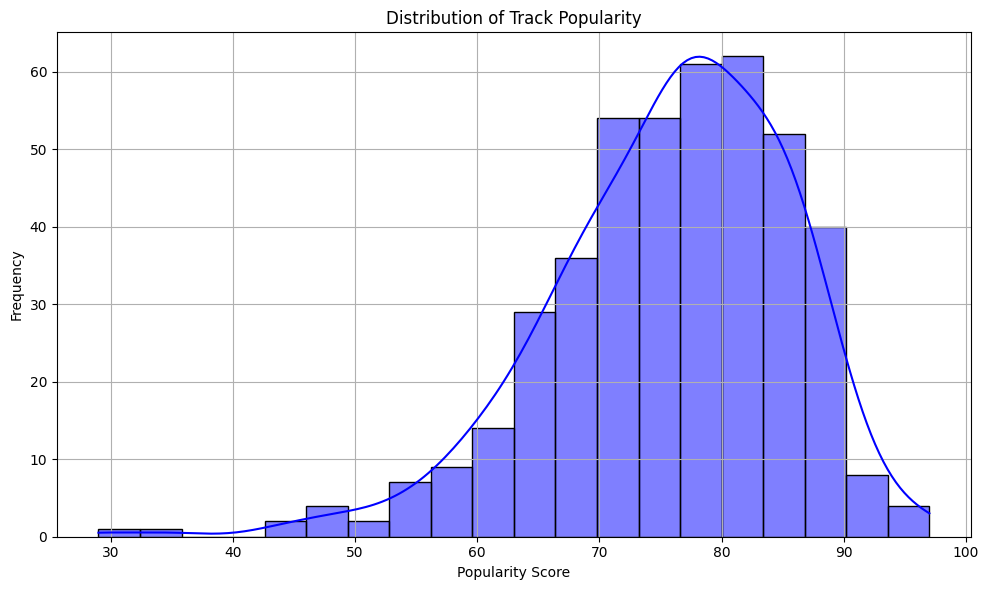

In [46]:
#  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values in Popularity (if any)
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce').fillna(df['Popularity'].median())

# Summary statistics
popularity_stats = df['Popularity'].describe().round(2)
# The median is already calculated within describe(), so you can access it directly.
# Applying round() to popularity_stats['50%'] will round the median value.
popularity_stats['median'] = popularity_stats['50%']

# Print summary statistics
print("\nSummary Statistics for Popularity:")
print(popularity_stats[['count', 'mean', 'median', 'std', 'min', 'max']].to_string())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')
plt.grid(True)
plt.tight_layout()

# Save and show plot
plt.savefig('popularity_distribution.png')
plt.show()


Pearson Correlation between Popularity and Duration (ms):
Correlation: 0.0407


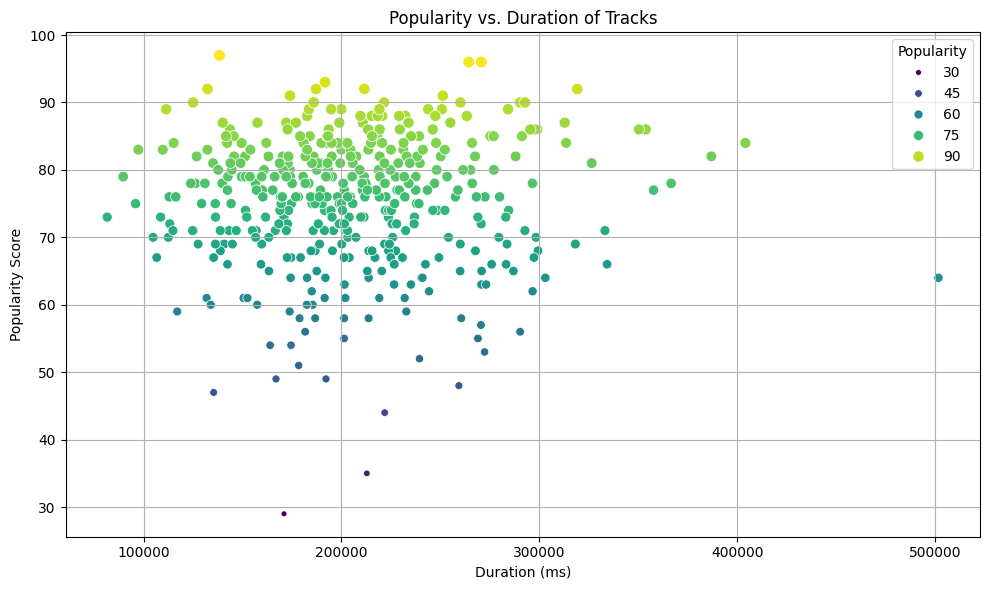

In [48]:
# Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce').fillna(df['Popularity'].median())
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce').fillna(df['Duration (ms)'].median())
# Calculate Pearson correlation
correlation = df['Popularity'].corr(df['Duration (ms)']).round(4)

# Print correlation
print("\nPearson Correlation between Popularity and Duration (ms):")
print(f"Correlation: {correlation}")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', hue='Popularity', size='Popularity', palette='viridis')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity Score')
plt.title('Popularity vs. Duration of Tracks')
plt.grid(True)
plt.tight_layout()

# Save and show plot
plt.savefig('popularity_vs_duration.png')
plt.show()


Artist with Highest Number of Tracks:
Artist: Drake, Track Count: 20


<ipython-input-49-7f62b307e8ac>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Artist', order=df['Artist'].value_counts().index, palette='viridis')


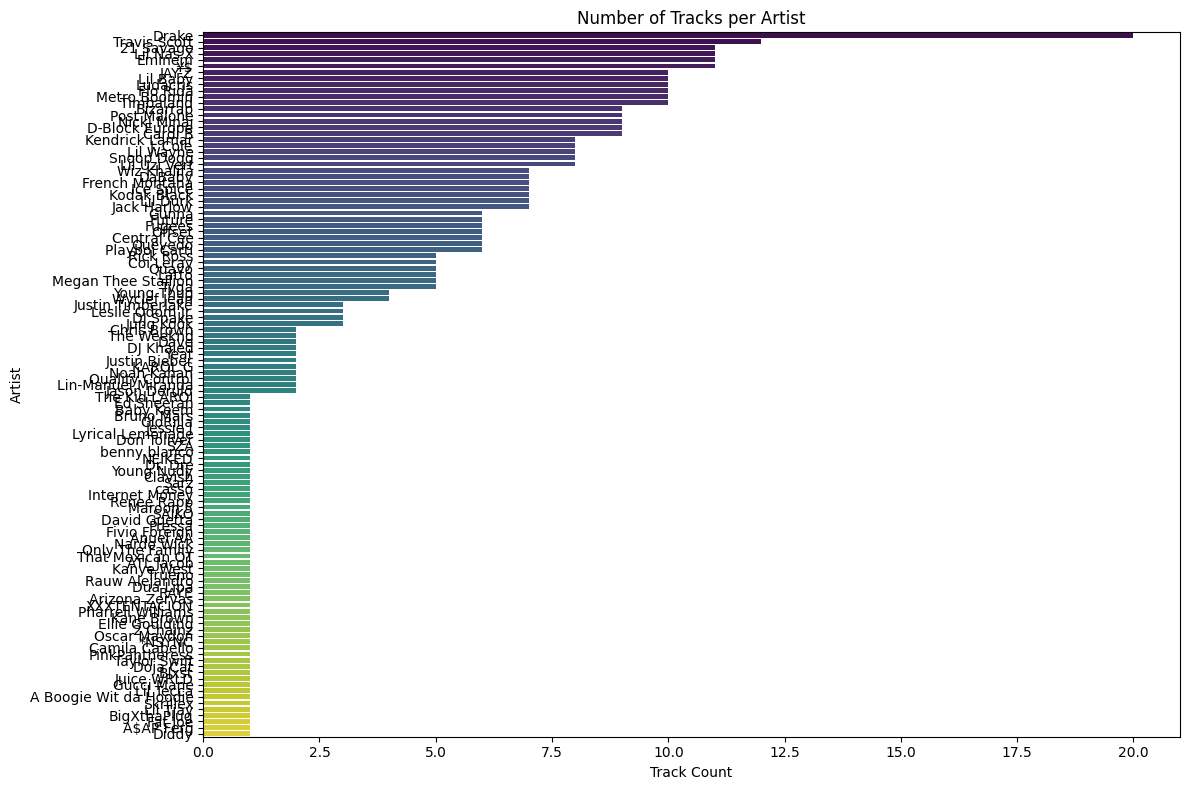


Track Counts for Each Artist:
                Artist  Track Count
                 Drake           20
          Travis Scott           12
             21 Savage           11
             Lil Nas X           11
                Eminem           11
                    ¥$           11
                 JAY-Z           10
              Lil Baby           10
              Ludacris           10
              Flo Rida           10
          Metro Boomin           10
             Timbaland           10
              Bizarrap            9
           Post Malone            9
           Nicki Minaj            9
        D-Block Europe            9
               Cardi B            9
        Kendrick Lamar            8
               J. Cole            8
             Lil Wayne            8
            Snoop Dogg            8
          Lil Uzi Vert            8
           Wiz Khalifa            7
                DaBaby            7
        French Montana            7
             Ice Spice           

In [49]:
# Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values in Artist
df['Artist'] = df['Artist'].fillna('Unknown')

# Count tracks per artist
artist_counts = df['Artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Track Count']

# Identify artist with highest track count
top_artist = artist_counts.iloc[0]

# Print artist with highest track count
print("\nArtist with Highest Number of Tracks:")
print(f"Artist: {top_artist['Artist']}, Track Count: {top_artist['Track Count']}")

# Countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Artist', order=df['Artist'].value_counts().index, palette='viridis')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.title('Number of Tracks per Artist')
plt.tight_layout()

# Save and show plot
plt.savefig('tracks_per_artist_countplot.png')
plt.show()

# Print track counts for all artists
print("\nTrack Counts for Each Artist:")
print(artist_counts.to_string(index=False))

In [50]:
#  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values in Popularity
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce').fillna(df['Popularity'].median())

# Sort by Popularity and select top 5 least popular tracks
least_popular = df[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity').head(5)

# Print results
print("\nTop 5 Least Popular Tracks:")
print(least_popular.to_string(index=False))


Top 5 Least Popular Tracks:
        Artist                    Track Name  Popularity
        Pressa Attachments (feat. Coi Leray)          29
 Justin Bieber                    Intentions          35
French Montana               Splash Brothers          44
French Montana               Splash Brothers          44
      Lil Baby                 On Me - Remix          47


In [51]:
# Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values in Popularity
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce').fillna(df['Popularity'].median())

# Count tracks per artist and get top 5
artist_counts = df['Artist'].value_counts().head(5).index

# Calculate average popularity for these artists
avg_popularity = df[df['Artist'].isin(artist_counts)].groupby('Artist')['Popularity'].mean().reset_index()
avg_popularity['Popularity'] = avg_popularity['Popularity'].round(2)

# Sort by average popularity
avg_popularity = avg_popularity.sort_values(by='Popularity', ascending=False)

# Identify artist with highest average popularity
top_artist = avg_popularity.iloc[0]

# Print results
print("\nAverage Popularity for Top 5 Artists by Track Count:")
print(avg_popularity.to_string(index=False))
print(f"\nArtist with Highest Average Popularity: {top_artist['Artist']} ({top_artist['Popularity']})")


Average Popularity for Top 5 Artists by Track Count:
      Artist  Popularity
Travis Scott       87.00
   21 Savage       84.18
      Eminem       83.64
       Drake       83.50
   Lil Nas X       76.09

Artist with Highest Average Popularity: Travis Scott (87.0)


In [52]:
# For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values in Popularity
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce').fillna(df['Popularity'].median())

# Get top 5 artists by track count
top_artists = df['Artist'].value_counts().head(5).index

# Find the most popular track for each of these artists
most_popular_tracks = df[df['Artist'].isin(top_artists)][['Artist', 'Track Name', 'Popularity']]
most_popular_tracks = most_popular_tracks.loc[most_popular_tracks.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]

# Sort by artist for consistency
most_popular_tracks = most_popular_tracks.sort_values(by='Artist')

# Print results
print("\nMost Popular Tracks for Top 5 Artists by Track Count:")
print(most_popular_tracks.to_string(index=False))


Most Popular Tracks for Top 5 Artists by Track Count:
      Artist                              Track Name  Popularity
   21 Savage                                  redrum          96
       Drake Rich Baby Daddy (feat. Sexyy Red & SZA)          92
      Eminem                              Without Me          90
   Lil Nas X                       THATS WHAT I WANT          81
Travis Scott              FE!N (feat. Playboi Carti)          93


<Figure size 1000x800 with 0 Axes>

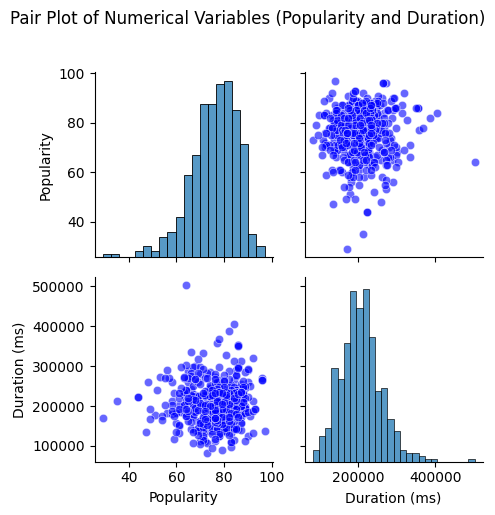

In [54]:
# Visualize relationships between multiple numerical variables simultaneously using a pair plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce').fillna(df['Popularity'].median())
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce').fillna(df['Duration (ms)'].median())
# Select numerical columns
numerical_cols = ['Popularity', 'Duration (ms)']
df_numerical = df[numerical_cols]

# Create pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(df_numerical, diag_kind='hist', plot_kws={'alpha': 0.6, 'color': 'blue'})
plt.suptitle('Pair Plot of Numerical Variables (Popularity and Duration)', y=1.02)
plt.tight_layout()

# Save and show plot
plt.savefig('pair_plot_numerical.png')
plt.show()

<ipython-input-56-ed57f130e571>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_artists, x='Artist', y='Duration (ms)', palette='viridis')


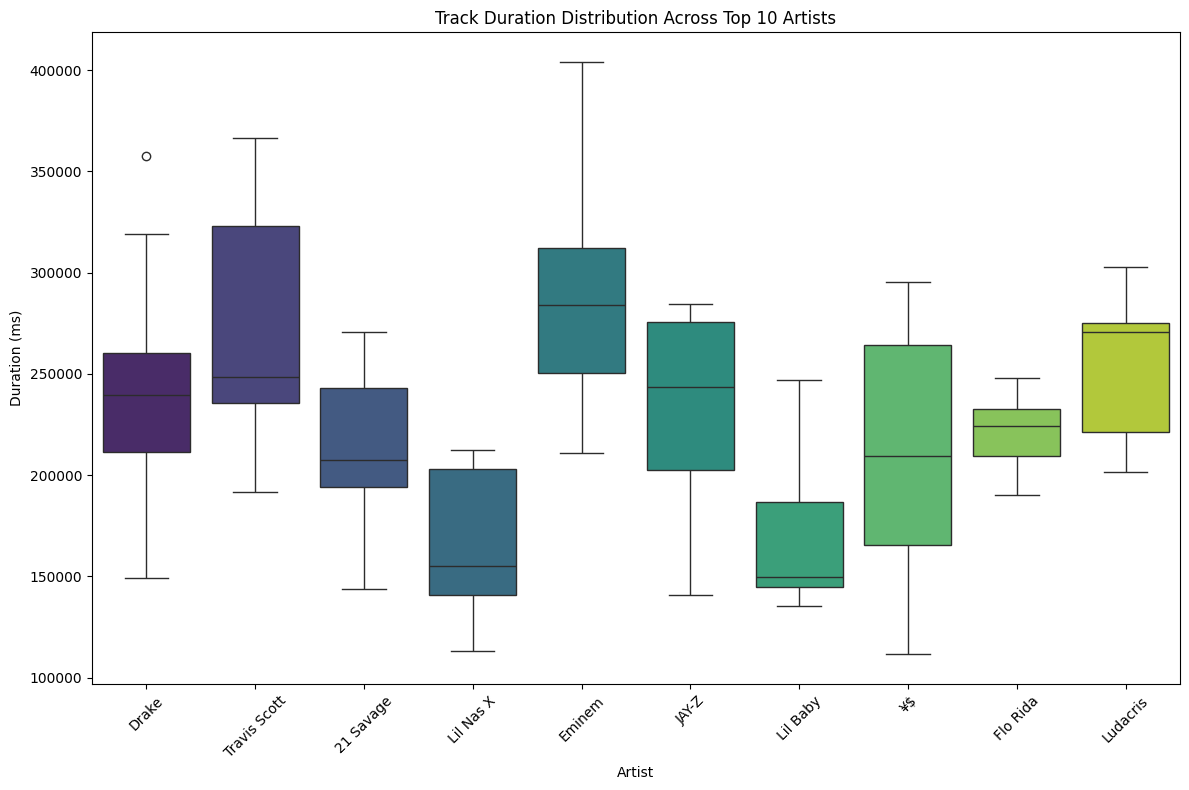

In [56]:
# Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce').fillna(df['Duration (ms)'].median())
df['Artist'] = df['Artist'].fillna('Unknown')

# Select top 10 artists by track count
top_artists = df['Artist'].value_counts().head(10).index
df_top_artists = df[df['Artist'].isin(top_artists)]

# Create box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_artists, x='Artist', y='Duration (ms)', palette='viridis')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Distribution Across Top 10 Artists')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show plot
plt.savefig('duration_boxplot.png')
plt.show()

<ipython-input-57-ee57eb80878b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_artists, x='Artist', y='Popularity', palette='viridis')


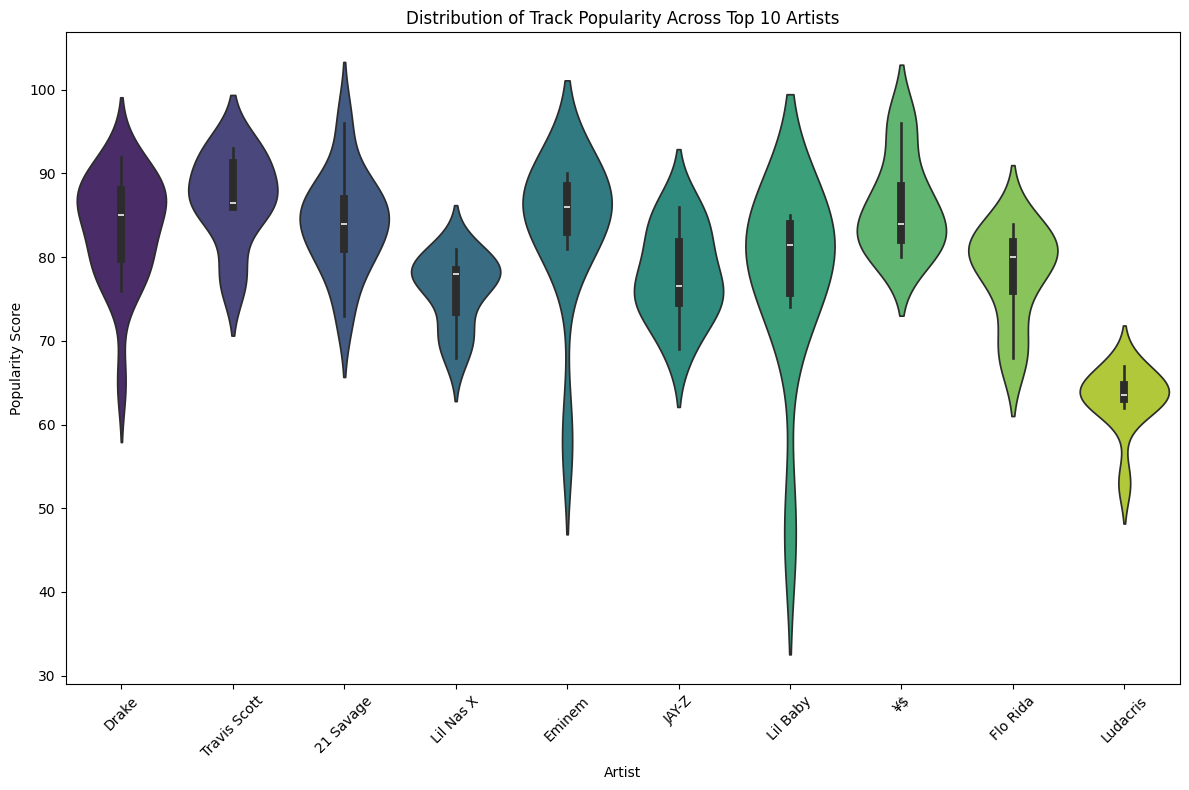

In [57]:
# How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spotify.csv')

# Clean data: handle null values
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce').fillna(df['Popularity'].median())
df['Artist'] = df['Artist'].fillna('Unknown')

# Select top 10 artists by track count
top_artists = df['Artist'].value_counts().head(10).index
df_top_artists = df[df['Artist'].isin(top_artists)]

# Create violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_top_artists, x='Artist', y='Popularity', palette='viridis')
plt.xlabel('Artist')
plt.ylabel('Popularity Score')
plt.title('Distribution of Track Popularity Across Top 10 Artists')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show plot
plt.savefig('popularity_violinplot.png')
plt.show()